In [68]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgbb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, matthews_corrcoef,cohen_kappa_score, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.utils.class_weight import compute_class_weight
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

# For Uni - Variate Analysis
from sklearn.feature_selection import VarianceThreshold
# Other Libraries
import os
import io
import requests
from sklearn.preprocessing import StandardScaler

from pyod.models.iforest import IForest

from pyod.models.deep_svdd import DeepSVDD
from imblearn.over_sampling import SMOTE


from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2
from sklearn.linear_model import Lasso

from boruta import BorutaPy
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error
#from eli5.sklearn import PermutationImportance
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

In [ ]:
# Import Dataset

df1=pd.read_csv(r"C:\Users\sulat\Downloads\heart.csv")
# Note


In [ ]:
df1

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [ ]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype=='object':
        df1[col]=le.fit_transform(df1[col])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


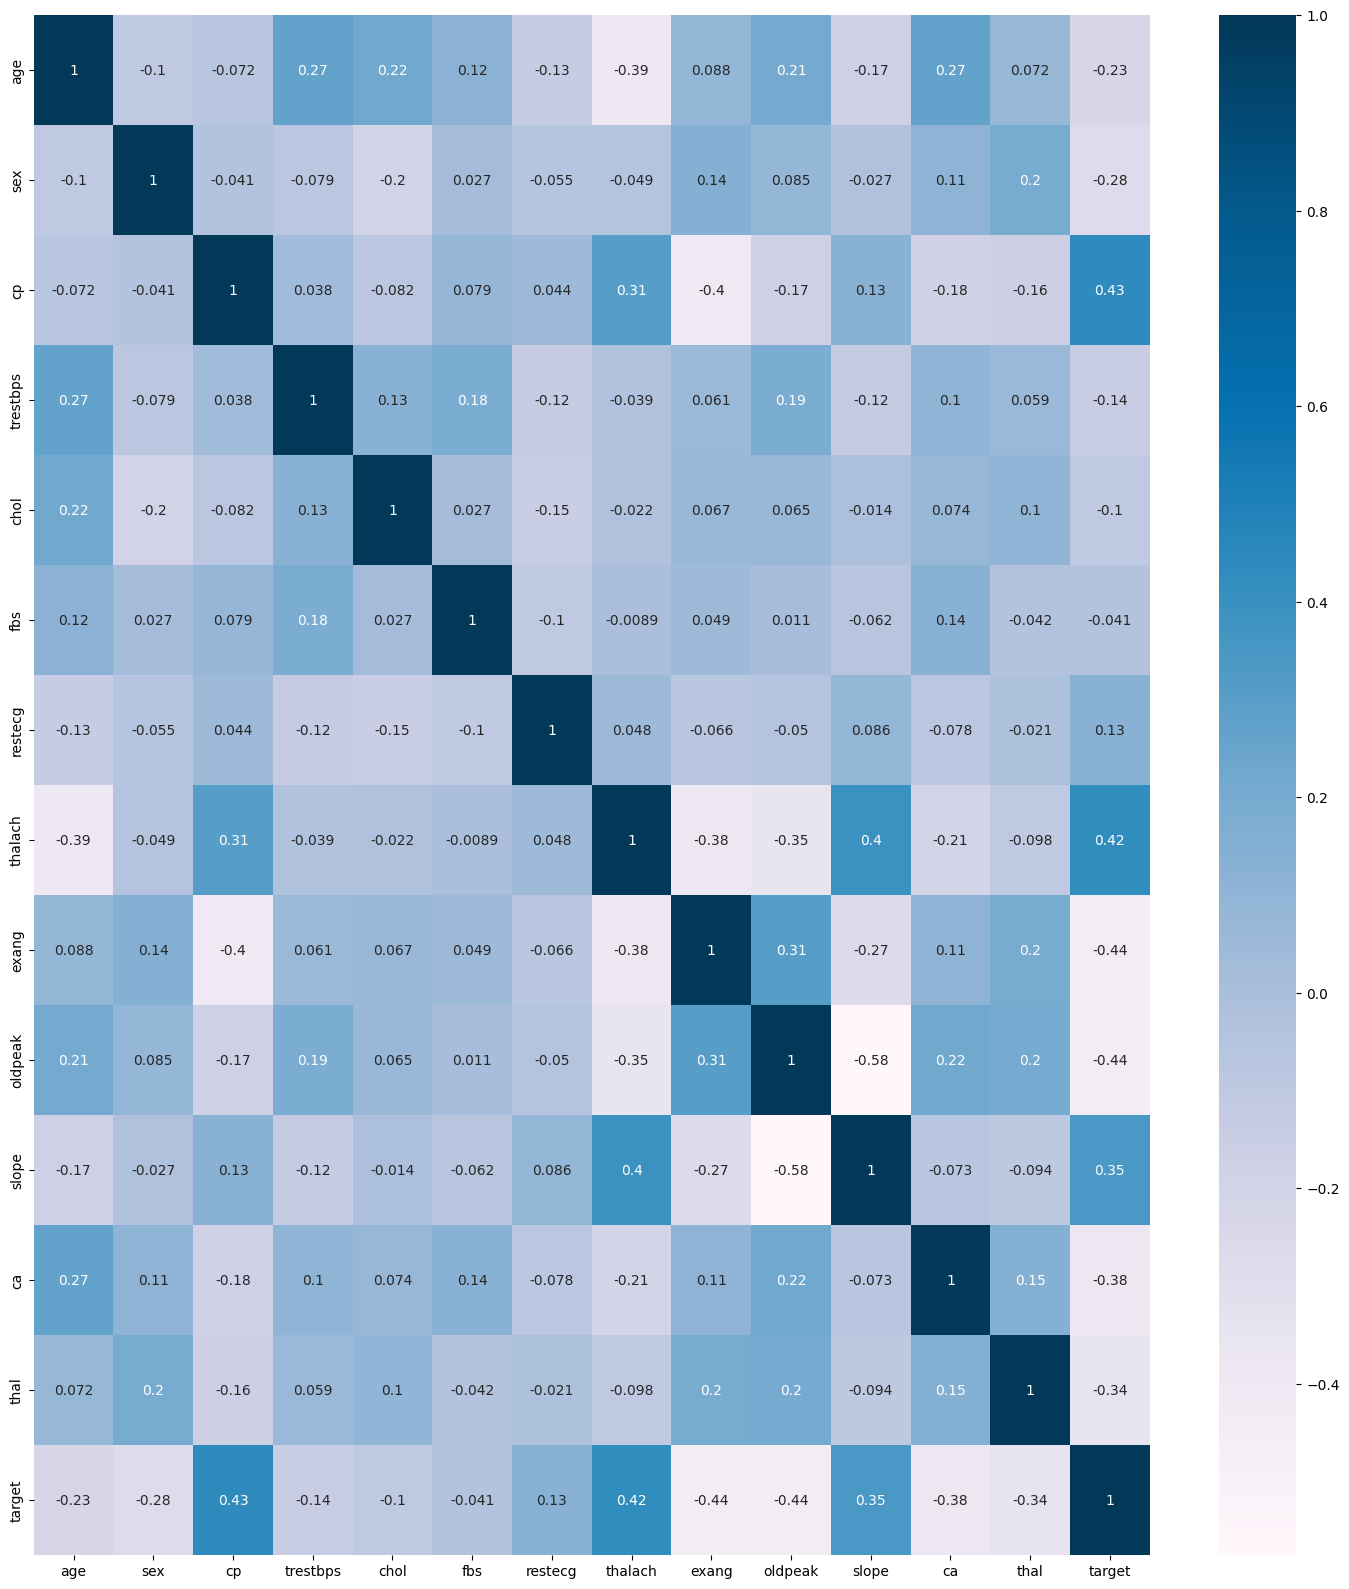

In [ ]:
plt.figure(figsize=(18,20))
dataplot = sns.heatmap(df1.corr(), cmap="PuBu", annot=True)
plt.show()

In [ ]:
df1.rename(columns={'target': 'TARGET'}, inplace=True)

In [ ]:

df1.TARGET.value_counts() / len(df1) * 100

TARGET
1    51.317073
0    48.682927
Name: count, dtype: float64

In [ ]:
# Duplicate Values

df1.TARGET.value_counts() 

TARGET
1    526
0    499
Name: count, dtype: int64

<Axes: ylabel='count'>

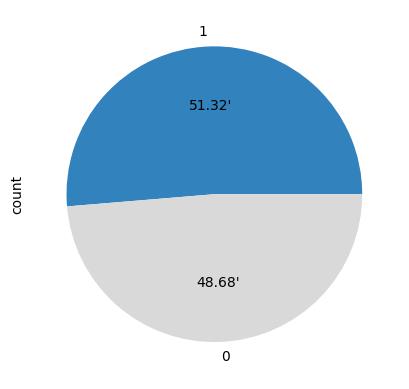

In [ ]:
df1["TARGET"].value_counts().plot(kind="pie", autopct ="%.2f'", cmap= 'tab20c')

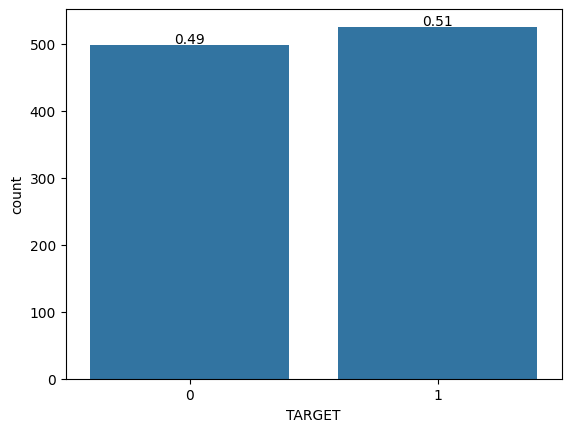

In [ ]:
total = float(len(df1)) # one person per row

ax = sns.countplot(x = "TARGET", data = df1)        
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

In [ ]:
df1.duplicated().sum()

723

In [ ]:
df1.drop('age', axis=1 , inplace=True)
df1.shape

(1025, 13)

In [ ]:
df1.drop('sex', axis=1 , inplace=True)
df1.shape

(1025, 12)

In [ ]:
cor_target = df1.corrwith(df1["TARGET"])

cor_target

cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
TARGET      1.000000
dtype: float64

In [ ]:
cor_target.sort_values(axis = 0, ascending = False)

TARGET      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cp        1025 non-null   int64  
 1   trestbps  1025 non-null   int64  
 2   chol      1025 non-null   int64  
 3   fbs       1025 non-null   int64  
 4   restecg   1025 non-null   int64  
 5   thalach   1025 non-null   int64  
 6   exang     1025 non-null   int64  
 7   oldpeak   1025 non-null   float64
 8   slope     1025 non-null   int64  
 9   ca        1025 non-null   int64  
 10  thal      1025 non-null   int64  
 11  TARGET    1025 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 96.2 KB


In [ ]:
# Duplicate Values

df1.duplicated().sum()

723

In [ ]:
df1=df1.drop_duplicates()
df1.duplicated().sum()

0

In [ ]:
df1

cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0     0       125   212    0        1      168      0      1.0      2   2   
1     0       140   203    1        0      155      1      3.1      0   0   
2     0       145   174    0        1      125      1      2.6      0   0   
3     0       148   203    0        1      161      0      0.0      2   1   
4     0       138   294    1        1      106      0      1.9      1   3   
..   ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   
723   2       120   211    0        0      115      0      1.5      1   0   
733   2       108   141    0        1      175      0      0.6      1   0   
739   0       128   255    0        1      161      1      0.0      2   1   
843   3       160   273    0        0      125      0      0.0      2   0   
878   0       120   188    0        1      113      0      1.4      1   1   

     thal  TARGET  
0       3       0  
1       3       0  
2       3       0  
3       3       0  
4       2       0  
..    ...     ...  
723     2       1  
733     2       1  
739     3       0  
843     2       0  
878     3       0  

[302 rows x 12 columns]

In [ ]:

# Assuming 'your_dataframe' is your DataFrame
df1 = df1.sample(frac=1, random_state=42)
df5 = df1.sample(n=300, random_state=42)
# Reset the index of the shuffled DataFrame
df5.reset_index(drop=True, inplace=True)
df5

cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0     0       130   206    0        0      132      1      2.4      1   2   
1     3       160   234    1        0      131      0      0.1      1   1   
2     0       138   243    0        0      152      1      0.0      1   0   
3     2       120   340    0        1      172      0      0.0      2   0   
4     0       138   183    0        1      182      0      1.4      2   0   
..   ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   
295   1       120   295    0        1      162      0      0.0      2   0   
296   1       130   221    0        0      163      0      0.0      2   0   
297   0       130   254    0        0      147      0      1.4      1   1   
298   2       135   252    0        0      172      0      0.0      2   0   
299   2       138   223    0        1      169      0      0.0      2   4   

     thal  TARGET  
0       3       0  
1       2       1  
2       2       1  
3       2       1  
4       2       1  
..    ...     ...  
295     2       1  
296     3       1  
297     3       0  
298     2       1  
299     2       1  

[300 rows x 12 columns]

In [ ]:
print(df5.TARGET.value_counts())

TARGET
1    164
0    136
Name: count, dtype: int64


<Axes: ylabel='count'>

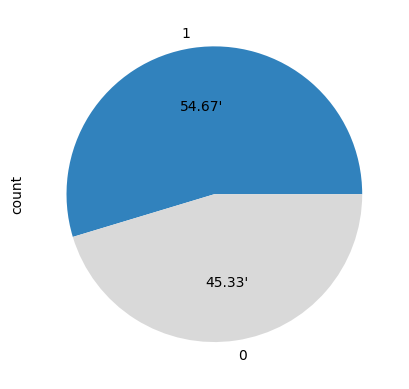

In [ ]:
df5["TARGET"].value_counts().plot(kind="pie", autopct ="%.2f'", cmap= 'tab20c')

In [ ]:
df6=df5.copy()

In [ ]:
# Segregating Target Variable from Predictors

df_x = df5.drop(labels = ["TARGET"], axis = 1) 
df_y = df5[["TARGET"]]

In [ ]:
# Train Isolation Forest model
isolation_forest = IForest(contamination=0.2, random_state=42)  # Adjust contamination as needed
isolation_forest.fit(df_x)

# Predict outliers
outlier_preds = isolation_forest.predict(df_x)

# Identify inliers (samples with label 1)
inliers_mask = outlier_preds == 0
X_inliers = df_x[inliers_mask]
df_y = df5[["TARGET"]] 
y_inliers = df_y[inliers_mask]

In [ ]:
outlier_preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
inliers_mask

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True, False,

In [ ]:
X_inliers

cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0     0       130   206    0        0      132      1      2.4      1   2   
2     0       138   243    0        0      152      1      0.0      1   0   
3     2       120   340    0        1      172      0      0.0      2   0   
4     0       138   183    0        1      182      0      1.4      2   0   
5     2       150   231    0        1      147      0      3.6      1   0   
..   ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   
295   1       120   295    0        1      162      0      0.0      2   0   
296   1       130   221    0        0      163      0      0.0      2   0   
297   0       130   254    0        0      147      0      1.4      1   1   
298   2       135   252    0        0      172      0      0.0      2   0   
299   2       138   223    0        1      169      0      0.0      2   4   

     thal  
0       3  
2       2  
3       2  
4       2  
5       2  
..    ...  
295     2  
296     3  
297     3  
298     2  
299     2  

[240 rows x 11 columns]

In [ ]:
X_inliers.reset_index(drop=True, inplace=True)
y_inliers.reset_index(drop=True, inplace=True)

In [ ]:
# Split data into features and target variable
df_x = X_inliers.copy()
y = y_inliers.copy()

# Feature scaling
scaler = StandardScaler()
X1 = scaler.fit_transform(df_x)

dfx=pd.DataFrame(X1,columns=df_x.columns)

In [ ]:
df_y

TARGET
0         0
1         1
2         1
3         1
4         1
..      ...
295       1
296       1
297       0
298       1
299       1

[300 rows x 1 columns]

In [ ]:
from imblearn.combine import SMOTEENN
smote = SMOTEENN()
df_x_resampled,df_y_resampled = smote.fit_resample(df_x,y)

In [ ]:
print(df_x.shape)
print(df_y.shape)

(240, 11)
(300, 1)


In [ ]:
print(df_x.shape)
print(y.shape)

(240, 11)
(240, 1)


In [ ]:
df_x_resampled.shape

(89, 11)

In [ ]:
df_y_resampled.shape

(89, 1)

In [ ]:
df_y_resampled.value_counts()

TARGET
0         50
1         39
Name: count, dtype: int64

In [ ]:
df_x = df5.drop(labels = ["TARGET"], axis = 1) 
df_y = df5[["TARGET"]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.2, random_state=42
)

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Convert back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 4. Reset index for alignment
X_train_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# If you want them back as DataFrames (with column names preserved)
import pandas as pd

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now you can reset index safely
X_train_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [ ]:
# Recursive Feature Elimination (RFE) with RandomForestClassifier
def rfe_feature_selection(X_train, X_test, y_train):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    best_accuracy = 0
    best_num_features = 0
    best_selected_features=[]
    # Iterate over different numbers of features
    for num_features in range(1, X_train.shape[1] + 1):
        # Initialize RFE
        rfe = RFE(estimator=rf, n_features_to_select=num_features, step=1)
    
        # Fit RFE
        rfe.fit(X_train, y_train)
        
        # Get selected features
        selected_features = X_train.columns[rfe.support_]
    
        # Transform datasets
        X_train_rfe = rfe.transform(X_train)
        X_test_rfe = rfe.transform(X_test)
    
        # Train RandomForestClassifier with selected features
        rf.fit(X_train_rfe, y_train)
    
        # Predict
        y_pred = rf.predict(X_test_rfe)
    
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
    
        # Update best accuracy and number of features if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_num_features = num_features
            best_selected_features = selected_features


    print("Best number of features:", best_num_features)
    print("Best selected features:", best_selected_features)
    print("Highest accuracy:", best_accuracy)
    return X_train_rfe, X_test_rfe, best_selected_features

In [ ]:
# Forward Feature Selection
def forward_feature_selection(X_train, X_test, y_train, model):
    selected_features = []
    best_accuracy = 0
    while len(selected_features) < X_train.shape[1]:
        for feature in X_train.columns:
            if feature not in selected_features:
                temp_features = selected_features + [feature]
                model.fit(X_train[temp_features], y_train)
                accuracy = model.score(X_test[temp_features], y_test)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_feature = feature
        selected_features.append(best_feature)
    print("Best selected features:", selected_features)
    print("Best accuracy:", best_accuracy)
    return X_train[selected_features], X_test[selected_features], selected_features

In [ ]:
# Forward Feature Selection
def forward_feature_selection11(X_train, X_test, y_train, y_test, model):
    selected_features = []
    best_accuracy = 0
    while len(selected_features) < X_train.shape[1]:
        best_accuracy_for_iteration = 0
        best_feature_for_iteration = None
        for feature in X_train.columns:
            if feature not in selected_features:
                temp_features = selected_features + [feature]
                model.fit(X_train[temp_features], y_train)
                accuracy = model.score(X_test[temp_features], y_test)
                if accuracy > best_accuracy_for_iteration:
                    best_accuracy_for_iteration = accuracy
                    best_feature_for_iteration = feature
        selected_features.append(best_feature_for_iteration)
        if best_accuracy_for_iteration > best_accuracy:
            best_accuracy = best_accuracy_for_iteration
    print("Best selected features:", selected_features)
    print("Best accuracy:", best_accuracy)
    return X_train[selected_features], X_test[selected_features], selected_features


In [ ]:
# Backward Feature Selection
def backward_feature_selection(X_train, X_test, y_train, model):
    selected_features = list(X_train.columns)
    best_accuracy = model.fit(X_train, y_train).score(X_test, y_test)  # Initial accuracy with all features
    while len(selected_features) > 0:
        best_feature = None
        for feature in selected_features:
            temp_features = selected_features.copy()
            temp_features.remove(feature)
            accuracy = model.fit(X_train[temp_features], y_train).score(X_test[temp_features], y_test)
            if accuracy >= best_accuracy:  # Adjusted condition
                best_accuracy = accuracy
                best_feature = feature
        if best_feature is not None:
            selected_features.remove(best_feature)
        else:
            break  # Exit the loop if no improvement is found
    print("Best selected features:", selected_features)
    print("Best accuracy:", best_accuracy)
    return X_train[selected_features], X_test[selected_features], selected_features

In [ ]:
# ANOVA F-value
def anova_f_value_selection11(X_train, X_test, y_train, y_test, k):
    skb = SelectKBest(score_func=f_classif, k=k)
    X_train_skb = skb.fit_transform(X_train, y_train)
    X_test_skb = skb.transform(X_test)
    return X_train_skb, X_test_skb, skb.get_support()

In [ ]:
# Pearson Correlation
def pearson_correlation_selection(X_train, X_test, threshold):
    corr_matrix = X_train.corr()
    corr_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    X_train_corr = X_train.drop(labels=corr_features, axis=1)
    X_test_corr = X_test.drop(labels=corr_features, axis=1)
    return X_train_corr, X_test_corr

In [ ]:
def lasso_regression_feature_selection(X_train, X_test, y_train, y_test, alpha):
    # Initialize Lasso regression model
    lasso = Lasso(alpha=alpha, random_state=42)
    
    # Fit Lasso regression on training data
    lasso.fit(X_train, y_train)
    
    # Get coefficients and select features with non-zero coefficients
    selected_features = X_train.columns[lasso.coef_ != 0]
    
    # Train RandomForestClassifier with selected features
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train[selected_features], y_train)
    
    # Predict
    y_pred = rf_classifier.predict(X_test[selected_features])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Selected features with Lasso regression:", selected_features)
    #print("Accuracy with selected features:", accuracy)
    
    return X_train[selected_features], X_test[selected_features], selected_features


In [ ]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [ ]:
# Boruta method
def boruta_feature_selection(X_train, X_test, y_train, y_test):
    # Initialize BorutaPy object with RandomForestClassifier estimator
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
    
    # Fit Boruta on training data
    boruta_selector.fit(X_train.values, y_train.values)
    
    # Get selected features
    selected_features = X_train.columns[boruta_selector.support_].tolist()
    
    # Train a model using selected features
    rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_selected.fit(X_train[selected_features], y_train)
    
    # Predict on testing data
    y_pred = rf_selected.predict(X_test[selected_features])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    #print("Selected features with Boruta:", selected_features)
    #print("Accuracy with selected features:", accuracy)
    
    return X_train[selected_features], X_test[selected_features], selected_features

In [ ]:
# Apply feature selection methods
X_train_rfe, X_test_rfe, rfe_fs = rfe_feature_selection(X_train_scaled, X_test_scaled, y_train)
X_train_forward, X_test_forward, forward_fs = forward_feature_selection11(X_train_scaled, X_test_scaled, y_train, y_test, RandomForestClassifier())
X_train_backward, X_test_backward, backward_fs = backward_feature_selection(X_train_scaled, X_test_scaled, y_train, RandomForestClassifier())
X_train_lasso, X_test_lasso, lasso_fs = lasso_regression_feature_selection(X_train_scaled, X_test_scaled, y_train, y_test, alpha=0.01)
X_train_boruta, X_test_boruta, boruta_fs =boruta_feature_selection(X_train_scaled, X_test_scaled, y_train, y_test)




Best number of features: 9
Best selected features: Index(['cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')
Highest accuracy: 0.8833333333333333
Best selected features: ['ca', 'fbs', 'restecg', 'oldpeak', 'cp', 'slope', 'exang', 'thal', 'trestbps', 'thalach', 'chol']
Best accuracy: 0.8833333333333333
Best selected features: ['cp', 'fbs', 'exang', 'oldpeak', 'slope', 'ca']
Best accuracy: 0.9
Selected features with Lasso regression: Index(['cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

best_accuracy = 0
best_selected_features = []

# Iterate over different numbers of features
for num_features in range(1, X_train_scaled.shape[1] + 1):
    # Apply ANOVA F-value selection
    X_train_skb, X_test_skb, selected_features = anova_f_value_selection11(X_train_scaled, X_test_scaled, y_train, y_test, num_features)
    
    # Train RandomForestClassifier with selected features
    rf_classifier.fit(X_train_skb, y_train)
    
    # Predict
    y_pred = rf_classifier.predict(X_test_skb)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update best accuracy and selected features if current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_selected_features = selected_features

print("Features with highest accuracy:", best_selected_features)
#print("Highest accuracy:", best_accuracy)

df_selected = X_train_scaled.loc[:, best_selected_features]
print(df_selected.columns)
anv_fs=df_selected.columns
X_train_skb, X_test_skb=X_train_scaled[df_selected.columns],X_test_scaled[df_selected.columns]

Features with highest accuracy: [ True False False False False  True  True  True False  True  True]
Index(['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


In [ ]:
X_train_corr, X_test_corr = pearson_correlation_selection(X_train_scaled, X_test_scaled, threshold=0.5)
pcorr_fs=X_train_corr.columns

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance

# 1. Train linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 2. Predictions
lr_train_preds = lr.predict(X_train_scaled)
lr_test_preds = lr.predict(X_test_scaled)

# 3. MAE scores
lr_train_mae = mean_absolute_error(y_train, lr_train_preds)
lr_test_mae = mean_absolute_error(y_test, lr_test_preds)

print("Train MAE:", lr_train_mae)
print("Test MAE:", lr_test_mae)

# 4. Permutation Importance (instead of eli5)
r = permutation_importance(
    lr, X_train_scaled, y_train, n_repeats=10, random_state=42
)

# Convert to Series for readability
import pandas as pd
lr_fi = pd.Series(r.importances_mean, index=X_train_scaled.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(lr_fi)


Train MAE: 0.29441553151400074
Test MAE: 0.2553470286266414

Feature Importance:
cp          0.124813
ca          0.113507
thal        0.063989
thalach     0.049208
exang       0.047412
oldpeak     0.033837
trestbps    0.021135
slope       0.009754
restecg     0.005089
fbs         0.000037
chol       -0.000505
dtype: float64


In [74]:
# Sort feature importances in descending order
sorted_indices = np.argsort(lr_fi)[::-1]

# Get the names of features corresponding to the sorted importances
sorted_features = X_train_scaled.columns[sorted_indices]

# Get the top 5 features
lr_features = sorted_features[:7]

print("Top 7 features:", lr_features)

Top 7 features: Index(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang'], dtype='object')


In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd

# 1. Train KNN with optimal k = sqrt(n)
knn = KNeighborsRegressor(n_neighbors=int(np.sqrt(len(X_train_scaled))))
knn.fit(X_train_scaled, y_train)

# 2. Predictions
knn_train_preds = knn.predict(X_train_scaled)
knn_test_preds = knn.predict(X_test_scaled)

# 3. MAE scores
knn_train_mae = mean_absolute_error(y_train, knn_train_preds)
knn_test_mae = mean_absolute_error(y_test, knn_test_preds)

print("Train MAE:", knn_train_mae)
print("Test MAE:", knn_test_mae)

# 4. Permutation Importance (modern version)
r = permutation_importance(
    knn, X_train_scaled, y_train, n_repeats=10, random_state=42
)

# Convert to Series for readability
knn_fi = pd.Series(r.importances_mean, index=X_train_scaled.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(knn_fi)


Train MAE: 0.26805555555555555
Test MAE: 0.23777777777777778

Feature Importance:
thal        0.103221
ca          0.101982
cp          0.097440
exang       0.080671
oldpeak     0.048970
thalach     0.042659
slope       0.019342
trestbps    0.010779
restecg     0.007012
fbs         0.006743
chol        0.004035
dtype: float64


In [78]:
# Sort feature importances in descending order
sorted_indices = np.argsort(knn_fi)[::-1]

# Get the names of features corresponding to the sorted importances
sorted_features = X_train_scaled.columns[sorted_indices]

# Get the top 5 features
knn_features = sorted_features[:7]

print("Top 7 features:", knn_features)

Top 7 features: Index(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang'], dtype='object')


In [80]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
import pandas as pd

# 1. Train Support Vector Regression
svr = SVR(C=0.1)
svr.fit(X_train_scaled, y_train.values.ravel())  # ensure y is 1D

# 2. Predictions
svr_train_preds = svr.predict(X_train_scaled)
svr_test_preds = svr.predict(X_test_scaled)

# 3. MAE scores
svr_train_mae = mean_absolute_error(y_train, svr_train_preds)
svr_test_mae = mean_absolute_error(y_test, svr_test_preds)

print("Train MAE:", svr_train_mae)
print("Test MAE:", svr_test_mae)

# 4. Permutation Importance
r = permutation_importance(
    svr, X_train_scaled, y_train, n_repeats=10, random_state=42
)

# Convert to Series for readability
svr_fi = pd.Series(r.importances_mean, index=X_train_scaled.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(svr_fi)


Train MAE: 0.25691477908021165
Test MAE: 0.23671690809839283

Feature Importance:
thal        0.120697
cp          0.116241
ca          0.111946
exang       0.067256
oldpeak     0.064725
thalach     0.042430
trestbps    0.035642
slope       0.025153
restecg     0.019495
fbs         0.015730
chol        0.014968
dtype: float64


In [81]:
# Sort feature importances in descending order
sorted_indices = np.argsort(svr_fi)[::-1]

# Get the names of features corresponding to the sorted importances
sorted_features = X_train_scaled.columns[sorted_indices]

# Get the top 5 features
svm_features = sorted_features[:7]

print("Top 7 features:", svm_features)

Top 7 features: Index(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang'], dtype='object')


In [82]:
# Random Forest
rf = RandomForestRegressor(max_depth=7)
rf.fit(X_train_scaled, y_train)

rf_train_preds = rf.predict(X_train_scaled)
rf_test_preds = rf.predict(X_test_scaled)

rf_train_mae = mean_absolute_error(y_train, rf_train_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)

rf_fi = rf.feature_importances_
rf_fi

array([0.2422686 , 0.08990628, 0.09291312, 0.00693164, 0.01659578,
       0.11505477, 0.01937481, 0.10489689, 0.03084531, 0.13881064,
       0.14240218])

In [83]:
# Sort feature importances in descending order
sorted_indices = np.argsort(rf_fi)[::-1]

# Get the names of features corresponding to the sorted importances
sorted_features = X_train_scaled.columns[sorted_indices]

# Get the top 5 features
rf_features = sorted_features[:7]

print("Top 7 features:", rf_features)

Top 7 features: Index(['cp', 'thal', 'ca', 'thalach', 'oldpeak', 'chol', 'trestbps'], dtype='object')


In [84]:
# XGBOOST
xgb = XGBRegressor(max_depth=7)
xgb.fit(X_train_scaled, y_train)

xgb_train_preds = xgb.predict(X_train_scaled)
xgb_test_preds = xgb.predict(X_test_scaled)

xgb_train_mae = mean_absolute_error(y_train, xgb_train_preds)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)

xgb_fi = xgb.feature_importances_
xgb_fi

array([0.18396859, 0.04411201, 0.02950792, 0.02001565, 0.03570561,
       0.047628  , 0.0043513 , 0.04035617, 0.14019915, 0.22843057,
       0.22572505], dtype=float32)

In [85]:
# Sort feature importances in descending order
sorted_indices = np.argsort(xgb_fi)[::-1]

# Get the names of features corresponding to the sorted importances
sorted_features = X_train_scaled.columns[sorted_indices]

# Get the top 5 features
xgb_features = sorted_features[:7]

print("Top 7 features:", xgb_features)

Top 7 features: Index(['ca', 'thal', 'cp', 'slope', 'thalach', 'trestbps', 'oldpeak'], dtype='object')


In [86]:
# Light GBM
lgb = LGBMRegressor(max_depth=7)
lgb.fit(X_train_scaled, y_train)

lgb_train_preds = lgb.predict(X_train_scaled)
lgb_test_preds = lgb.predict(X_test_scaled)

lgb_train_mae = mean_absolute_error(y_train, lgb_train_preds)
lgb_test_mae = mean_absolute_error(y_test, lgb_test_preds)

lgb_fi = lgb.feature_importances_
lgb_fi

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 11
[LightGBM] [Info] Start training from score 0.541667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

array([ 56, 120, 186,   7,  38, 151,  16, 146,  22,  60,  30])

In [87]:
# Sort feature importances in descending order
sorted_indices = np.argsort(lgb_fi)[::-1]

# Get the names of features corresponding to the sorted importances
sorted_features = X_train_scaled.columns[sorted_indices]

# Get the top 5 features
lgb_features = sorted_features[:7]

print("Top 7 features:", lgb_features)

Top 7 features: Index(['chol', 'thalach', 'oldpeak', 'trestbps', 'ca', 'cp', 'restecg'], dtype='object')


In [88]:
# create a dataframe for feature importances and mean absolute error
mae_df = pd.DataFrame(columns=['Train','Test'])

# add mae's to the mae_df
mae_df.loc['Linear Regression','Train'] =  lr_train_mae
mae_df.loc['Linear Regression','Test'] =  lr_test_mae

mae_df.loc['KNN','Train'] =  knn_train_mae
mae_df.loc['KNN','Test'] =  knn_test_mae

mae_df.loc['Support Vector Regression','Train'] =  svr_train_mae
mae_df.loc['Support Vector Regression','Test'] =  svr_test_mae

mae_df.loc['Random Forest','Train'] =  rf_train_mae
mae_df.loc['Random Forest','Test'] =  rf_test_mae

mae_df.loc['XGBoost','Train'] =  xgb_train_mae
mae_df.loc['XGBoost','Test'] =  xgb_test_mae

mae_df.loc['Light GBM','Train'] =  lgb_train_mae
mae_df.loc['Light GBM','Test'] =  lgb_test_mae

mae_df['Model'] = mae_df.index
mae_df['Train'] = mae_df['Train'].astype(float)
mae_df['Test'] = mae_df['Test'].astype(float)

mae_df = pd.melt(mae_df, id_vars=['Model'], value_vars=['Train','Test'])

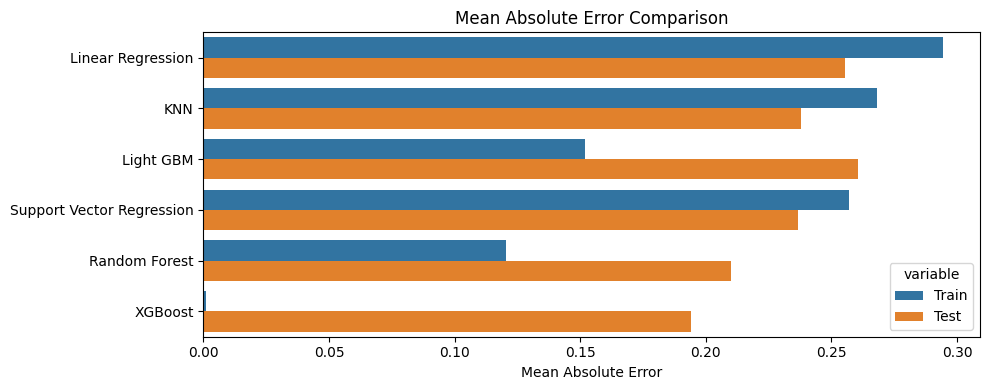

In [89]:
# plot mae
fig,ax = plt.subplots(figsize=(10,4))
ax = sns.barplot(x='value',y='Model', hue='variable',data=mae_df.sort_values(by='value',ascending=False))
plt.xlabel('Mean Absolute Error')
plt.ylabel('')
plt.title('Mean Absolute Error Comparison')
plt.tight_layout()

In [90]:
# create feature importance dataframe
fi_df = pd.DataFrame(columns=['LR', 'KNN','SVR','RF','XGB','LGBM','Features'])
#feature_names =    ["a", "b", "c", "d","e", "f", "g", "h","i", "j", "k", "l","m", "n", "o"]

fi_df['Features'] = dfx.columns
fi_df['LR'] = lr_fi
fi_df['KNN'] = knn_fi
fi_df['SVR'] = svr_fi
fi_df['RF'] = rf_fi
fi_df['XGB'] = xgb_fi
fi_df['LGBM'] = lgb_fi/1000

In [91]:
fi_df

LR  KNN  SVR        RF       XGB   LGBM  Features
0  NaN  NaN  NaN  0.242269  0.183969  0.056        cp
1  NaN  NaN  NaN  0.089906  0.044112  0.120  trestbps
2  NaN  NaN  NaN  0.092913  0.029508  0.186      chol
3  NaN  NaN  NaN  0.006932  0.020016  0.007       fbs
4  NaN  NaN  NaN  0.016596  0.035706  0.038   restecg
5  NaN  NaN  NaN  0.115055  0.047628  0.151   thalach
6  NaN  NaN  NaN  0.019375  0.004351  0.016     exang
7  NaN  NaN  NaN  0.104897  0.040356  0.146   oldpeak
8  NaN  NaN  NaN  0.030845  0.140199  0.022     slope
9  NaN  NaN  NaN  0.138811  0.228431  0.060        ca
10 NaN  NaN  NaN  0.142402  0.225725  0.030      thal

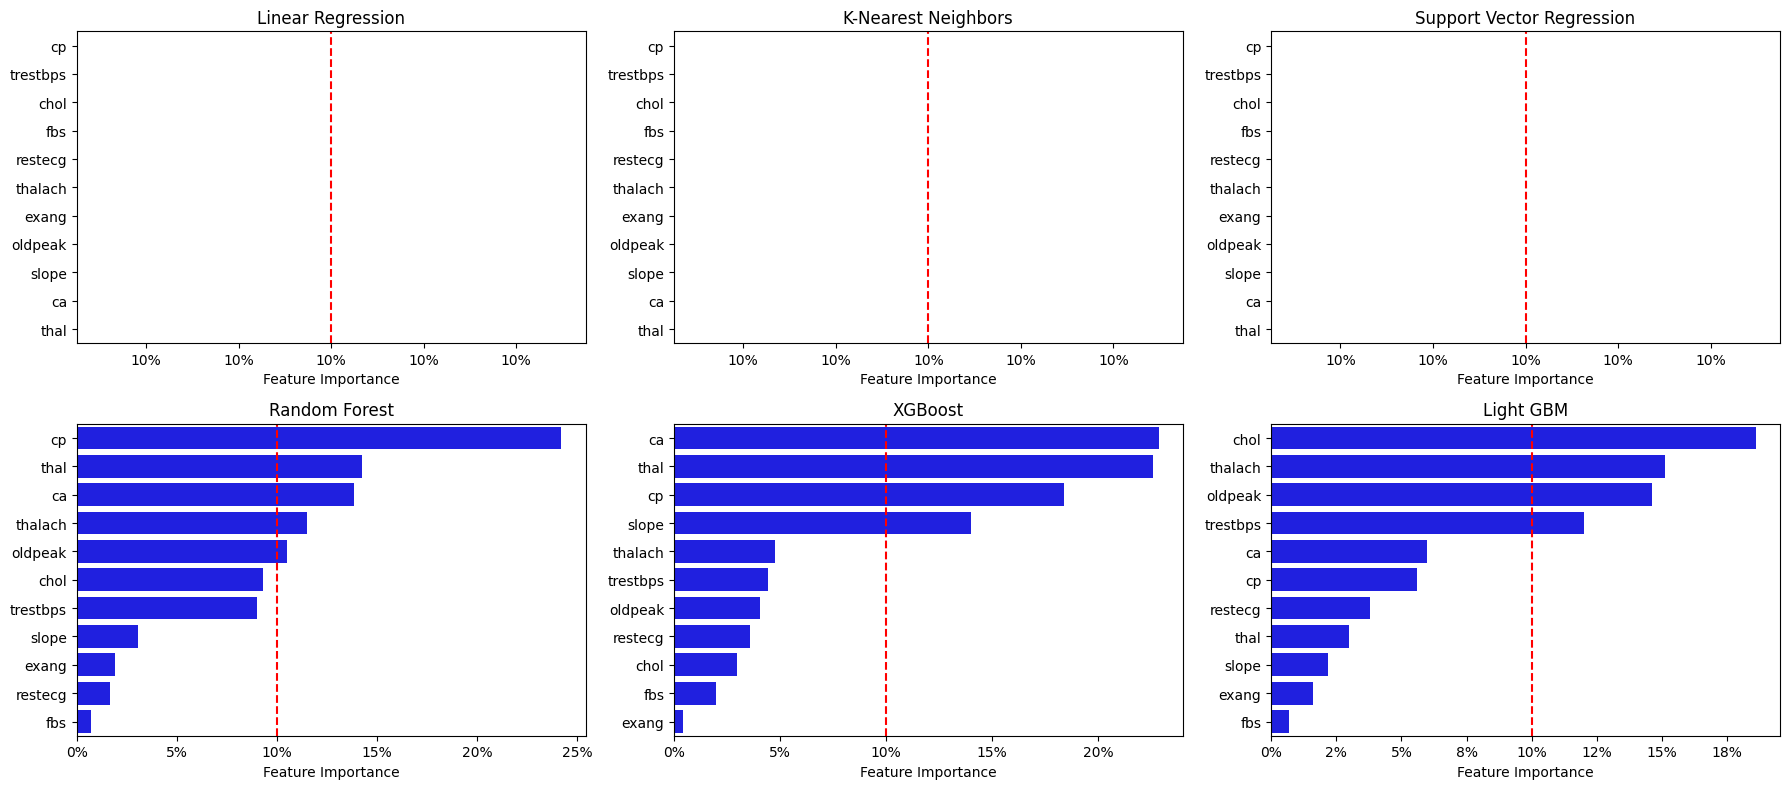

In [92]:
fig = plt.figure(figsize=(18,8))

plt.subplot(2, 3, 1)
ax = sns.barplot(x='LR',y='Features',data=fi_df.sort_values(by='LR',ascending=False),color='b')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.title('Linear Regression')
plt.axvline(x=0.1, color='r', linestyle='dashed')
plt.tight_layout()

plt.subplot(2, 3, 2)
ax = sns.barplot(x='KNN',y='Features',data=fi_df.sort_values(by='KNN',ascending=False),color='b')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.title('K-Nearest Neighbors')
plt.axvline(x=0.1, color='r', linestyle='dashed')
plt.tight_layout()

plt.subplot(2, 3, 3)
ax = sns.barplot(x='SVR',y='Features',data=fi_df.sort_values(by='SVR',ascending=False),color='b')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.title('Support Vector Regression')
plt.axvline(x=0.1, color='r', linestyle='dashed')
plt.tight_layout()

plt.subplot(2, 3, 4)
ax = sns.barplot(x='RF',y='Features',data=fi_df.sort_values(by='RF',ascending=False),color='b')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.title('Random Forest')
plt.axvline(x=0.1, color='r', linestyle='dashed')
plt.tight_layout()

plt.subplot(2, 3, 5)
ax = sns.barplot(x='XGB',y='Features',data=fi_df.sort_values(by='XGB',ascending=False),color='b')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.title('XGBoost')
plt.axvline(x=0.1, color='r', linestyle='dashed')
plt.tight_layout()

plt.subplot(2, 3, 6)
ax = sns.barplot(x='LGBM',y='Features',data=fi_df.sort_values(by='LGBM',ascending=False),color='b')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.title('Light GBM')
plt.axvline(x=0.1, color='r', linestyle='dashed')
plt.tight_layout()

In [93]:
from boruta import BorutaPy

new_rf = RandomForestRegressor(n_jobs = -1, max_depth = 5)

boruta_selector = BorutaPy(new_rf, n_estimators = 'auto', random_state = 0)
boruta_selector.fit(np.array(X_train_scaled), np.array(y_train))

boruta_ranking = boruta_selector.ranking_
boruta_features = np.array(dfx.columns)[boruta_ranking <= 3]

In [94]:
boruta_ranking = pd.DataFrame(data=boruta_ranking, index=X_train_scaled.columns.values, columns=['values'])
boruta_ranking['Variable'] = boruta_ranking.index
boruta_ranking.sort_values(['values'], ascending=True, inplace=True)

In [95]:
feature_names =dfx.columns

In [96]:
# Convert array to list
feature_list = boruta_features.tolist()
#feature_list

In [97]:
from collections import Counter

# Lists of features
LRf = lr_features.tolist()
KNNf= knn_features.tolist()
SVRf= svm_features.tolist()
RFf= rf_features.tolist()
XGBf= xgb_features.tolist()
LGBMf=lgb_features.tolist()
BORf=boruta_features.tolist()

# Combine all lists
all_features = LRf + KNNf + SVRf + RFf + XGBf + LGBMf + BORf
Uf=list(set().union(LRf,KNNf,SVRf,RFf,XGBf,LGBMf,BORf))
# Count occurrences of each feature
feature_counts = Counter(all_features)

# Find the features with the highest counts
majority_features = [feature for feature, count in feature_counts.items() if count > 3]  # Adjust threshold as needed
#print("All features:", Uf)
print("Majority features:", majority_features)

Majority features: ['cp', 'trestbps', 'chol', 'restecg', 'thalach', 'ca', 'oldpeak']


In [98]:
def evall(Xf,yf,fs,sm):
    t=0
    data=[]
    
    # Perform StratifiedKFold cross-validation
    cv = StratifiedKFold(n_splits=10)
    weights1 = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(yf),
    y=yf.values.reshape(-1))
    print("weights = ",weights1)
    a=weights1[0]
    b=weights1[1]

    lr = LogisticRegression(random_state=42, class_weight={0: a, 1: b})
    svm = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    ab = AdaBoostClassifier()
    gb = GradientBoostingClassifier()
    lgbm = lgbb.LGBMClassifier(verbose=-1)
    cb = CatBoostClassifier(verbose=0)
    et = ExtraTreesClassifier()
    rf= RandomForestClassifier()
    xgb = XGBClassifier()
    gnb = GaussianNB()


    clff=[lr, svm, knn, dt, ab, gb, lgbm, cb, et, rf, xgb, gnb]
    cl=['lr','svm','knn','dt','ab','gb','lgbm','cb','et','rf','xgb','gnb']
    
    for clf in clff:
        accuracies4 = []
        spec4=[]
        mcc4=[]
        ck4=[]
        f14=[]
        pr4=[]
        re4=[]
        gmean4=[]
        r4=[]
        for train_index, test_index in cv.split(Xf, yf):
            X_traincv, X_testcv = Xf.iloc[train_index], Xf.iloc[test_index]
            y_traincv, y_testcv = yf.iloc[train_index], yf.iloc[test_index]
      
            clf.fit(X_traincv, y_traincv)
            y_pred1 = clf.predict(X_testcv)
            
            accuracy1 = accuracy_score(y_testcv, y_pred1)
            accuracies4.append(accuracy1)
            
            clf_report = pd.DataFrame(classification_report(y_testcv, y_pred1, output_dict=True))
            cm = confusion_matrix(y_testcv, y_pred1)
            tn = cm[0][0]
            fn = cm[1][0]
            fp = cm[0][1]
            tp = cm[1][1]
            
            sp = tn/(tn+fp)
            spec4.append(sp)
            
            Pre = precision_score(y_testcv, y_pred1)
            pr4.append(Pre)
            
            Rec=recall_score(y_testcv, y_pred1)
            re4.append(Rec)
            
            gm=mt.sqrt(sp*Rec)
            gmean4.append(gm)
            
            m=matthews_corrcoef(y_testcv, y_pred1)
            mcc4.append(m)
            
            c=cohen_kappa_score(y_testcv, y_pred1)
            ck4.append(c)
            
            f=f1_score(y_testcv, y_pred1)
            f14.append(f)
            
            roc=roc_auc_score(y_testcv, y_pred1)
            r4.append(roc)
            
        average_accuracy4 = sum(accuracies4) / len(accuracies4)
        average_specificity4 = sum(spec4) / len(spec4)
        average_mcc4 = sum(mcc4) / len(mcc4)
        average_ck4 = sum(ck4) / len(ck4)
        average_f14 = sum(f14) / len(f14)
        average_Precision4 = sum(pr4) / len(pr4)
        average_Recall4 = sum(re4) / len(re4)
        average_gmean4 = sum(gmean4) / len(gmean4)
        average_roc4 = sum(r4) / len(r4)

        #data.append((clff[t],f"{average_accuracy4:{w}.{pre}}",f"{average_specificity4:{w}.{pre}}",f"{average_mcc4:{w}.{pre}}",f"{average_ck4:{w}.{pre}}",f"{average_f14:{w}.{pre}}",f"{average_Precision4:{w}.{pre}}",f"{average_Recall4:{w}.{pre}}",f"{average_gmean4:{w}.{pre}}",f"{average_roc4:{w}.{pre}}"))
        data.append((fs,sm,cl[t],average_accuracy4,average_specificity4,average_mcc4,average_ck4,average_f14,average_Precision4,average_Recall4,average_gmean4,average_roc4))

        t=t+1
    return data

In [99]:
def favg(df):
    selected_columns = ['Accuracy','Specificity','MCC','CK','F1-Score','Precision','Recall','Gmean','roc_Score']
    row_averages = df[selected_columns].mean(axis=1)
    df['Pmean'] = row_averages
    print(df.to_string(index=False,justify='left'))
    return df

In [100]:
def evgraph(df):
    
    # Transpose the DataFrame
    selected_columns = ['Classifier','Accuracy','Specificity','MCC','CK','F1-Score','Precision','Recall','Gmean','roc_Score','Pmean']
    df1 = df[selected_columns]
    dfr_transposed = df1.set_index('Classifier').T.reset_index()
    # Plotting the multi-line graph with transposed data
    plt.figure(figsize=(8, 6))

    classifiers = dfr_transposed.columns[1:]  # Exclude the 'index' column

    for classifier in classifiers:
        plt.plot(dfr_transposed['index'], dfr_transposed[classifier], marker='o', linestyle='-', label=classifier)

    # Adding labels and title
    plt.xlabel('Metrics')
    plt.ylabel('Classifier Values')
    plt.title('Classifiers Across Metrics')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

    # Adding a legend
    plt.legend()
    # Adding horizontal grid lines
    plt.grid(True, axis='y')
    # Display the plot
    plt.tight_layout()
    plt.show()

In [101]:
fdf=dfx.copy()
fdf['TARGET']=y
fdf

cp  trestbps      chol       fbs   restecg   thalach     exang  \
0   -0.931964  0.053635 -0.882045 -0.229416 -1.060409 -0.831144  1.606888   
1   -0.931964  0.589984 -0.051709 -0.229416 -1.060409  0.054033  1.606888   
2    1.120067 -0.616802  2.125117 -0.229416  0.912445  0.939209 -0.622321   
3   -0.931964  0.589984 -1.398199 -0.229416  0.912445  1.381797 -0.622321   
4    1.120067  1.394508 -0.321007 -0.229416  0.912445 -0.167261 -0.622321   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.094051 -0.616802  1.115249 -0.229416  0.912445  0.496621 -0.622321   
236  0.094051  0.053635 -0.545422 -0.229416 -1.060409  0.540880 -0.622321   
237 -0.931964  0.053635  0.195148 -0.229416 -1.060409 -0.167261 -0.622321   
238  1.120067  0.388853  0.150265 -0.229416 -1.060409  0.939209 -0.622321   
239  1.120067  0.589984 -0.500539 -0.229416  0.912445  0.806433 -0.622321   

      oldpeak     slope        ca      thal  TARGET  
0    1.641159 -0.902916  1.448212  1.265890       0  
1   -0.897261 -0.902916 -0.671123 -0.586632       1  
2   -0.897261  0.949220 -0.671123 -0.586632       1  
3    0.583484  0.949220 -0.671123 -0.586632       1  
4    2.910368 -0.902916 -0.671123 -0.586632       0  
..        ...       ...       ...       ...     ...  
235 -0.897261  0.949220 -0.671123 -0.586632       1  
236 -0.897261  0.949220 -0.671123  1.265890       1  
237  0.583484 -0.902916  0.388545  1.265890       0  
238 -0.897261  0.949220 -0.671123 -0.586632       1  
239 -0.897261  0.949220  3.567546 -0.586632       1  

[240 rows x 12 columns]

In [102]:
RFEf=rfe_fs.tolist()
FORWf=forward_fs
BACKWf=backward_fs
ANOf=anv_fs.tolist()
PEARf=pcorr_fs.tolist()
LASSOf=lasso_fs.tolist()

In [103]:
odresult=[]
fsname=['LRf' , 'KNNf' , 'SVRf' , 'RFf', 'XGBf', 'LGBMf', 'BORf', 'RFEf', 'FORWf', 'BACKWf', 'ANOf', 'PEARf', 'LASSOf', 'Uf', 'majority_features']

lt=[LRf , KNNf , SVRf , RFf, XGBf, LGBMf, BORf, RFEf, FORWf, BACKWf, ANOf, PEARf, LASSOf, Uf, majority_features]
#lt

tin=0



weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
LRf   0        lr       0.725000  0.665455     0.438812 0.432345 0.762712  0.768174   0.768132 0.705747 0.716793   0.664797
LRf   0       svm       0.733333  0.587273     0.449825 0.436265 0.784113  0.741570   0.840110 0.693520 0.713691   0.664411
LRf   0       knn       0.725000  0.637273     0.436004 0.430022 0.766746  0.750333   0.789560 0.704881 0.713417   0.661471
LRf   0        dt       0.650000  0.574545     0.288361 0.278878 0.695344  0.700429   0.703297 0.623597 0.638921   0.572597
LRf   0        ab       0.704167  0.656364     0.399865 0.394979 0.738986  0.746047   0.738462 0.691249 0.697413   0.640837
LRf   0        gb       0.750000  0.616364     0.483063 0.471080 0.796722  0.758650   0.846703 0.711290 0.731533   0.685045
LRf   0      lgbm       0.750000  0.664545     0.496167 0.482351 0.786118  0.772461   0.812637 0.

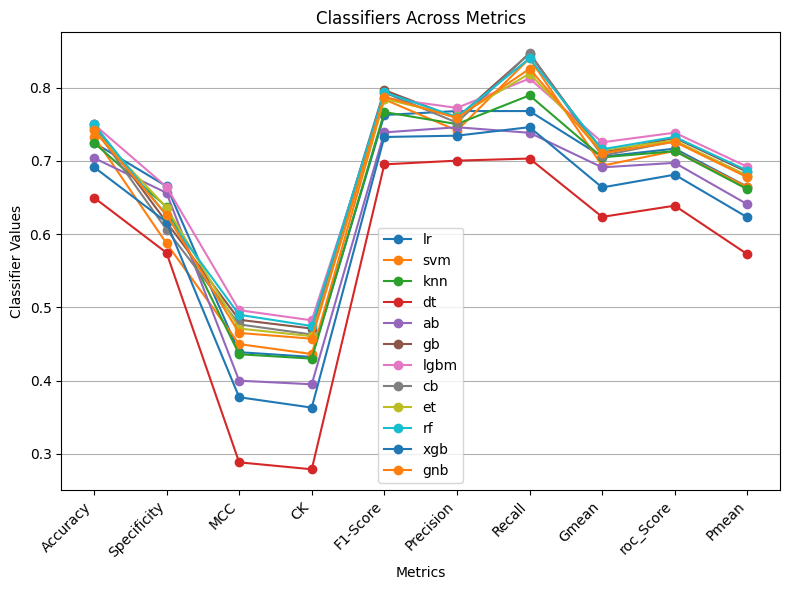

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
LRf   1        lr       0.710847  0.643956     0.429423 0.420800 0.728254  0.691849   0.776374 0.702473 0.710165   0.646015
LRf   1       svm       0.743386  0.680769     0.493134 0.486222 0.756959  0.716911   0.804945 0.738524 0.742857   0.684856
LRf   1       knn       0.743783  0.776923     0.490454 0.487237 0.732778  0.760351   0.710440 0.741597 0.743681   0.687472
LRf   1        dt       0.700000  0.698352     0.404152 0.400637 0.700211  0.704041   0.702747 0.697713 0.700549   0.634267
LRf   1        ab       0.739286  0.739560     0.480910 0.478762 0.737698  0.739103   0.739560 0.738270 0.739560   0.681412
LRf   1        gb       0.739683  0.719231     0.481538 0.479404 0.745167  0.733443   0.760440 0.738037 0.739835   0.681864
LRf   1

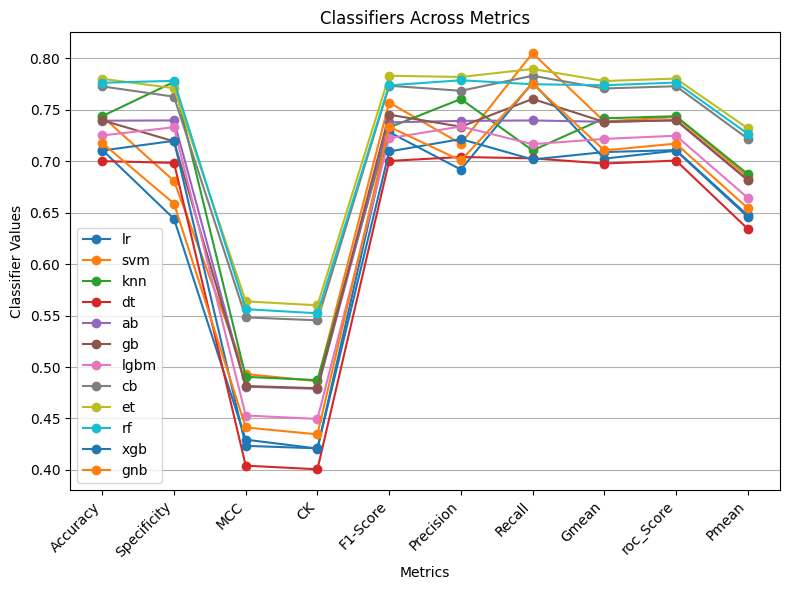

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
KNNf  0        lr       0.725000  0.665455     0.438812 0.432345 0.762712  0.768174   0.768132 0.705747 0.716793   0.664797
KNNf  0       svm       0.733333  0.587273     0.449825 0.436265 0.784113  0.741570   0.840110 0.693520 0.713691   0.664411
KNNf  0       knn       0.725000  0.637273     0.436004 0.430022 0.766746  0.750333   0.789560 0.704881 0.713417   0.661471
KNNf  0        dt       0.645833  0.603636     0.285147 0.278516 0.682728  0.703490   0.675275 0.627082 0.639456   0.571240
KNNf  0        ab       0.704167  0.656364     0.399865 0.394979 0.738986  0.746047   0.738462 0.691249 0.697413   0.640837
KNNf  0        gb       0.750000  0.616364     0.483063 0.471080 0.796722  0.758650   0.846703 0.711290 0.731533

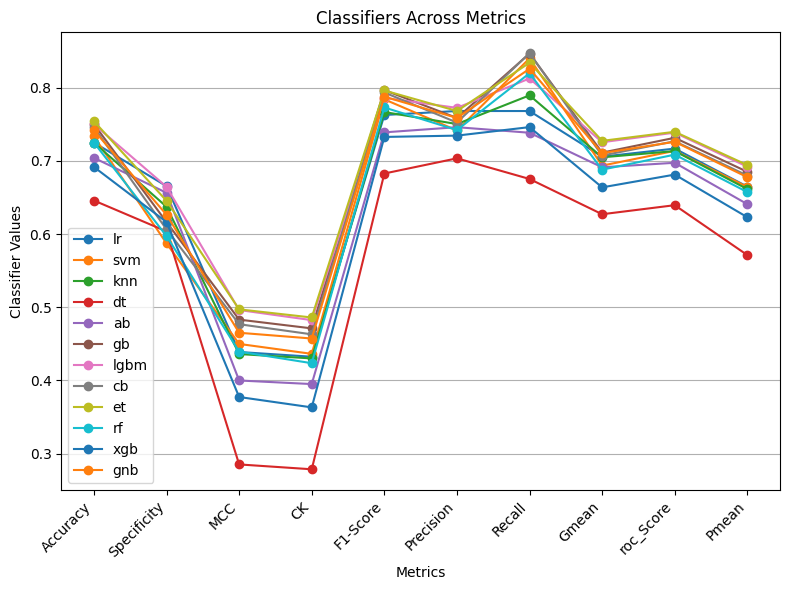

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
KNNf  1        lr       0.718122  0.653297     0.444185 0.436642 0.735622  0.698613   0.783516 0.711422 0.718407   0.655536
KNNf  1       svm       0.729101  0.646703     0.466976 0.458745 0.750764  0.701945   0.812088 0.721123 0.729396   0.668538
KNNf  1       knn       0.717989  0.748352     0.442340 0.435947 0.706045  0.736938   0.687912 0.712812 0.718132   0.656274
KNNf  1        dt       0.684921  0.711538     0.373216 0.370455 0.677045  0.700330   0.659341 0.683343 0.685440   0.616181
KNNf  1        ab       0.746825  0.725275     0.501113 0.494452 0.749442  0.737914   0.770330 0.743965 0.747802   0.690791
KNNf  1        gb       0.764815  0.747802     0.533798 0.530023 0.769103  0.760750   0.782967 0.762977 0.765385   0.713069
KNNf  1

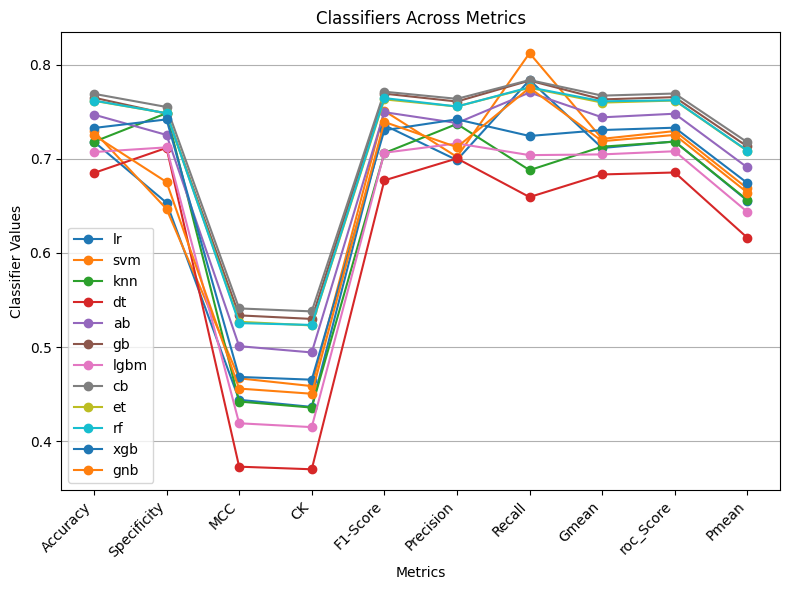

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
SVRf  0        lr       0.725000  0.665455     0.438812 0.432345 0.762712  0.768174   0.768132 0.705747 0.716793   0.664797
SVRf  0       svm       0.733333  0.587273     0.449825 0.436265 0.784113  0.741570   0.840110 0.693520 0.713691   0.664411
SVRf  0       knn       0.725000  0.637273     0.436004 0.430022 0.766746  0.750333   0.789560 0.704881 0.713417   0.661471
SVRf  0        dt       0.658333  0.604545     0.306588 0.300311 0.698222  0.712142   0.696154 0.638256 0.650350   0.584989
SVRf  0        ab       0.704167  0.656364     0.399865 0.394979 0.738986  0.746047   0.738462 0.691249 0.697413   0.640837
SVRf  0        gb       0.750000  0.616364     0.483063 0.471080 0.796722  0.758650   0.846703 0.711290 0.731533

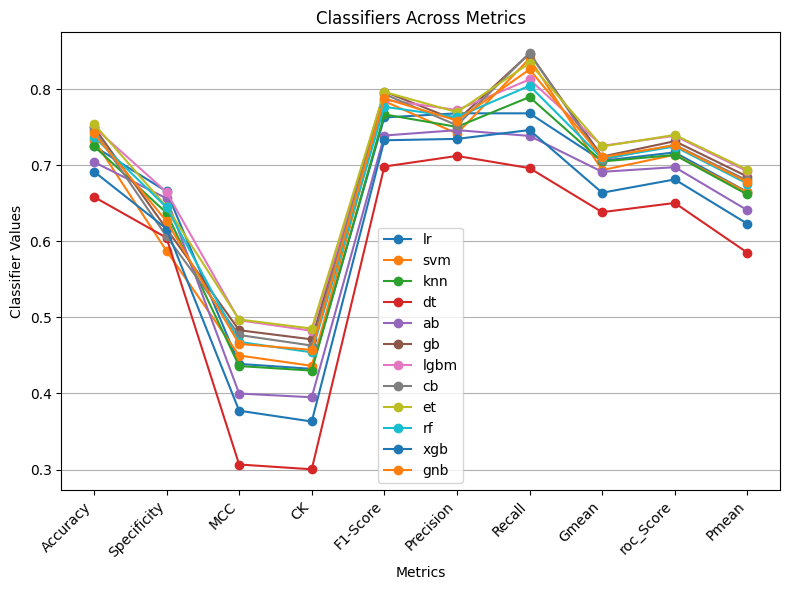

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
SVRf  1        lr       0.707143  0.637912     0.422690 0.414419 0.725533  0.687021   0.776374 0.699437 0.707143   0.641963
SVRf  1       svm       0.725000  0.637912     0.459457 0.449972 0.746450  0.694006   0.811538 0.717198 0.724725   0.662918
SVRf  1       knn       0.747090  0.769231     0.499429 0.493745 0.735579  0.756628   0.724725 0.742614 0.746978   0.690669
SVRf  1        dt       0.718122  0.763187     0.443779 0.436413 0.705456  0.749045   0.674176 0.714029 0.718681   0.658099
SVRf  1        ab       0.717460  0.710989     0.440896 0.435946 0.715867  0.716093   0.725275 0.713393 0.718132   0.654895
SVRf  1        gb       0.721561  0.719780     0.446048 0.443101 0.722006  0.725684   0.723626 0.719049 0.721703   0.660284
SVRf  1

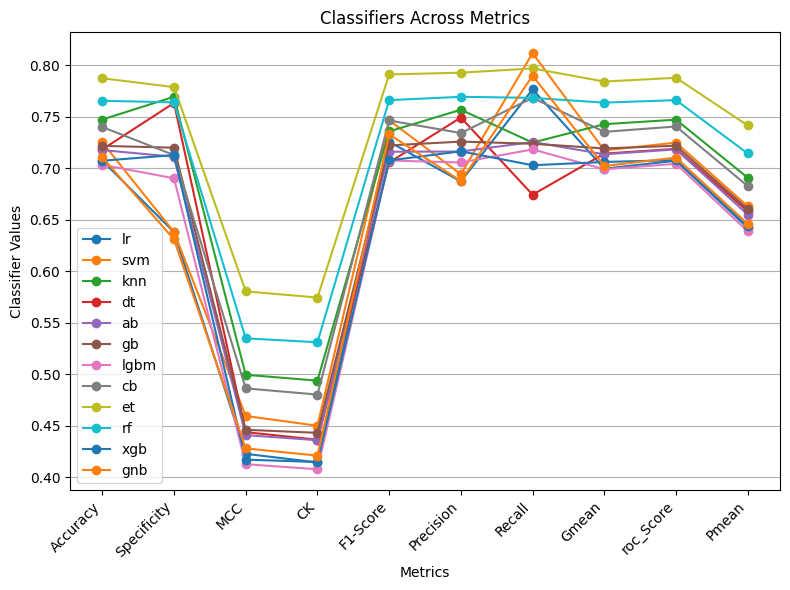

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
RFf   0        lr       0.808333  0.773636     0.611887 0.607318 0.832422  0.835848   0.833516 0.800264 0.803576   0.767422
RFf   0       svm       0.800000  0.753636     0.592949 0.588099 0.828259  0.826889   0.834615 0.789822 0.794126   0.756488
RFf   0       knn       0.779167  0.645455     0.550082 0.536003 0.819632  0.772553   0.877473 0.749077 0.761464   0.721212
RFf   0        dt       0.766667  0.723636     0.523721 0.520719 0.796771  0.800277   0.796703 0.756168 0.760170   0.716092
RFf   0        ab       0.779167  0.742727     0.551098 0.547476 0.807642  0.814199   0.805495 0.771083 0.774111   0.732555
RFf   0        gb       0.775000  0.694545     0.541903 0.532388 0.809746  0.794321   0.832967 0.754739 0.763756

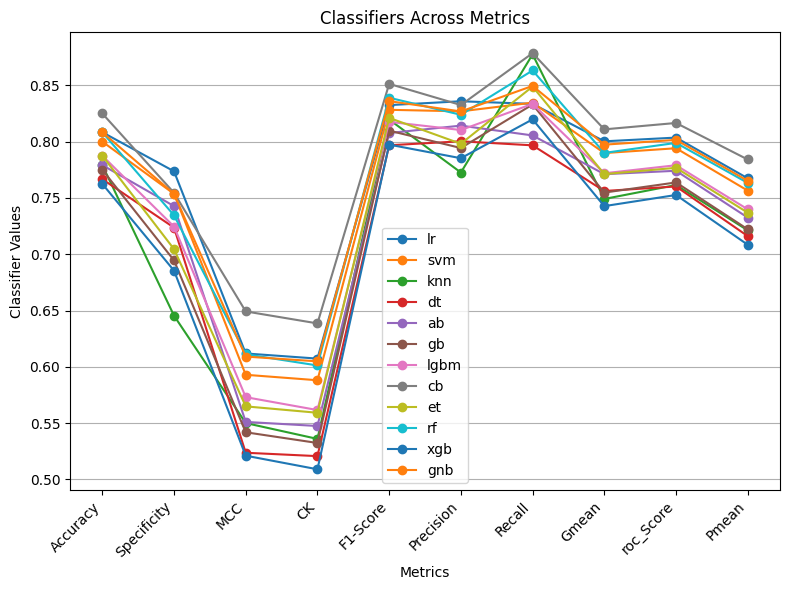

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
RFf   1        lr       0.830159  0.819780     0.667387 0.660549 0.830370  0.826803   0.841758 0.827970 0.830769   0.792838
RFf   1       svm       0.833730  0.834615     0.670617 0.667571 0.834900  0.839913   0.833516 0.832888 0.834066   0.797980
RFf   1       knn       0.808201  0.790659     0.621284 0.616795 0.809474  0.797802   0.826923 0.806506 0.808791   0.765160
RFf   1        dt       0.804762  0.807143     0.612054 0.609584 0.804394  0.808567   0.803297 0.804154 0.805220   0.762130
RFf   1        ab       0.808333  0.806593     0.621491 0.617293 0.809837  0.812981   0.812088 0.807488 0.809341   0.767272
RFf   1        gb       0.826852  0.792857     0.657617 0.654118 0.834427  0.811373   0.862088 0.825332 0.827473   0.788015
RFf   1

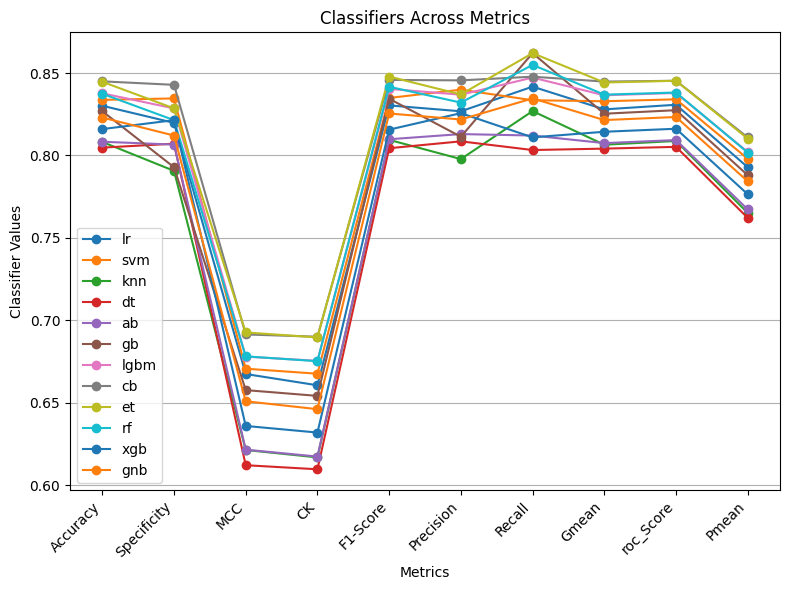

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
XGBf  0        lr       0.816667  0.783636     0.629257 0.625046 0.839900  0.842074   0.841758 0.810307 0.812697   0.777927
XGBf  0       svm       0.837500  0.773636     0.671404 0.663956 0.862215  0.845042   0.885714 0.825183 0.829675   0.799370
XGBf  0       knn       0.804167  0.694545     0.600045 0.590457 0.838429  0.799247   0.885165 0.781704 0.789855   0.753735
XGBf  0        dt       0.716667  0.656364     0.430852 0.421159 0.749201  0.752672   0.762088 0.697825 0.709226   0.655117
XGBf  0        ab       0.775000  0.732727     0.545987 0.538383 0.802922  0.809530   0.804945 0.763187 0.768836   0.726835
XGBf  0        gb       0.787500  0.704545     0.566386 0.559397 0.820920  0.798616   0.849451 0.770149 0.776998

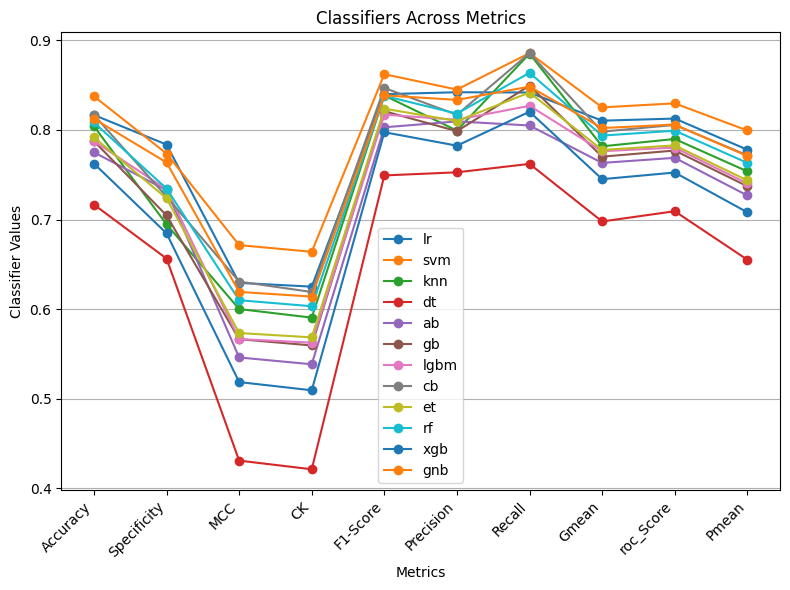

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
XGBf  1        lr       0.822354  0.788462     0.651857 0.644377 0.829270  0.810505   0.856044 0.818856 0.822253   0.782664
XGBf  1       svm       0.862698  0.848901     0.727800 0.725396 0.865378  0.856667   0.876923 0.862046 0.862912   0.832080
XGBf  1       knn       0.819180  0.797253     0.642304 0.638287 0.823936  0.811538   0.841209 0.817293 0.819231   0.778915
XGBf  1        dt       0.765476  0.747802     0.538843 0.530807 0.773228  0.774906   0.783516 0.759637 0.765659   0.715542
XGBf  1        ab       0.808333  0.848352     0.626713 0.616929 0.795957  0.838485   0.769231 0.803484 0.808791   0.768475
XGBf  1        gb       0.834259  0.820879     0.673231 0.668508 0.838945  0.836177   0.847802 0.831841 0.834341   0.798443
XGBf  1

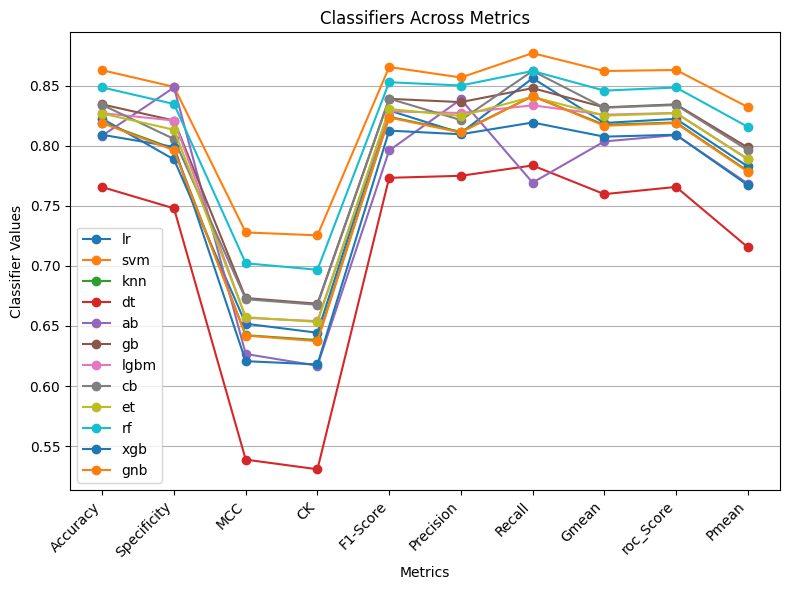

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
LGBMf 0        lr       0.770833  0.744545     0.538499 0.531513 0.798004  0.813303   0.789560 0.762325 0.767053   0.723960
LGBMf 0       svm       0.766667  0.636364     0.519403 0.508519 0.810646  0.768898   0.862088 0.735695 0.749226   0.706389
LGBMf 0       knn       0.712500  0.557273     0.407612 0.392457 0.766805  0.722925   0.826374 0.666682 0.691823   0.638272
LGBMf 0        dt       0.775000  0.764545     0.547271 0.542379 0.799097  0.822404   0.782418 0.770562 0.773482   0.730795
LGBMf 0        ab       0.779167  0.736364     0.549110 0.547825 0.807723  0.805971   0.810989 0.771864 0.773676   0.731410
LGBMf 0        gb       0.775000  0.696364     0.542420 0.533547 0.808078  0.792270   0.831868 0.755359 0.764116

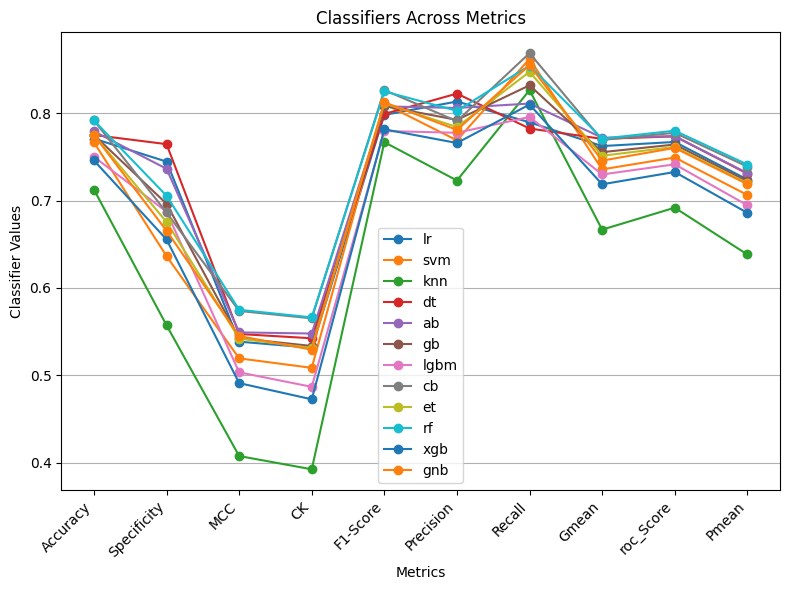

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
LGBMf 1        lr       0.771825  0.745604     0.551702 0.543722 0.777634  0.765810   0.798901 0.767832 0.772253   0.721698
LGBMf 1       svm       0.786905  0.746154     0.584365 0.573415 0.794020  0.776004   0.827473 0.780146 0.786813   0.739477
LGBMf 1       knn       0.786772  0.761538     0.585263 0.573936 0.790656  0.786057   0.813187 0.781499 0.787363   0.740697
LGBMf 1        dt       0.757937  0.762088     0.522256 0.516287 0.758467  0.771023   0.754945 0.754961 0.758516   0.706276
LGBMf 1        ab       0.772487  0.785165     0.549611 0.545124 0.770905  0.787005   0.760989 0.770932 0.773077   0.723922
LGBMf 1        gb       0.779497  0.762088     0.566232 0.559235 0.782505  0.776741   0.797802 0.776083 0.779945   0.731126
LGBMf 1

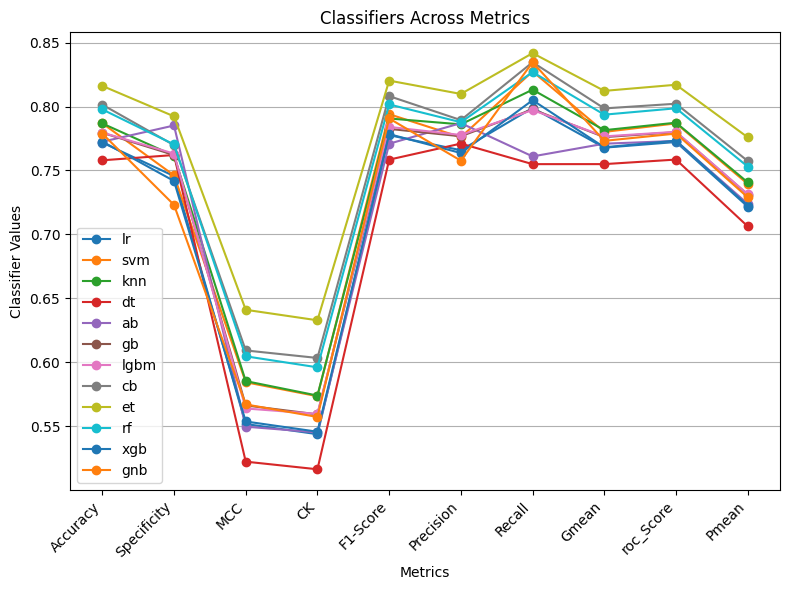

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
BORf  0        lr       0.808333  0.773636     0.611887 0.607318 0.832422  0.835848   0.833516 0.800264 0.803576   0.767422
BORf  0       svm       0.800000  0.753636     0.592949 0.588099 0.828259  0.826889   0.834615 0.789822 0.794126   0.756488
BORf  0       knn       0.779167  0.645455     0.550082 0.536003 0.819632  0.772553   0.877473 0.749077 0.761464   0.721212
BORf  0        dt       0.779167  0.723636     0.552205 0.546410 0.808215  0.802337   0.819231 0.767054 0.771434   0.729965
BORf  0        ab       0.779167  0.742727     0.551098 0.547476 0.807642  0.814199   0.805495 0.771083 0.774111   0.732555
BORf  0        gb       0.779167  0.704545     0.550831 0.541851 0.812505  0.799321   0.832967 0.760485 0.768756

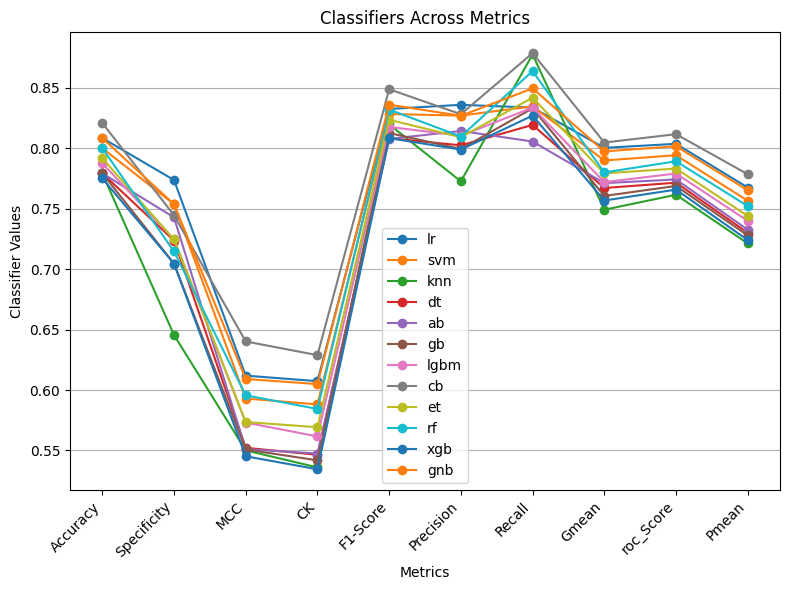

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
BORf  1        lr       0.833598  0.820330     0.677981 0.667799 0.835997  0.834294   0.848901 0.830513 0.834615   0.798225
BORf  1       svm       0.844577  0.863736     0.693044 0.689091 0.842446  0.863917   0.825824 0.843369 0.844780   0.812309
BORf  1       knn       0.826984  0.821429     0.658660 0.654251 0.826785  0.824368   0.834066 0.826155 0.827747   0.788938
BORf  1        dt       0.826984  0.828022     0.657348 0.654090 0.826697  0.830805   0.826923 0.825663 0.827473   0.789334
BORf  1        ab       0.804762  0.791758     0.616115 0.609867 0.806026  0.799426   0.819231 0.802952 0.805495   0.761737
BORf  1        gb       0.830423  0.806593     0.664100 0.660897 0.836647  0.822595   0.854945 0.828817 0.830769   0.792865
BORf  1

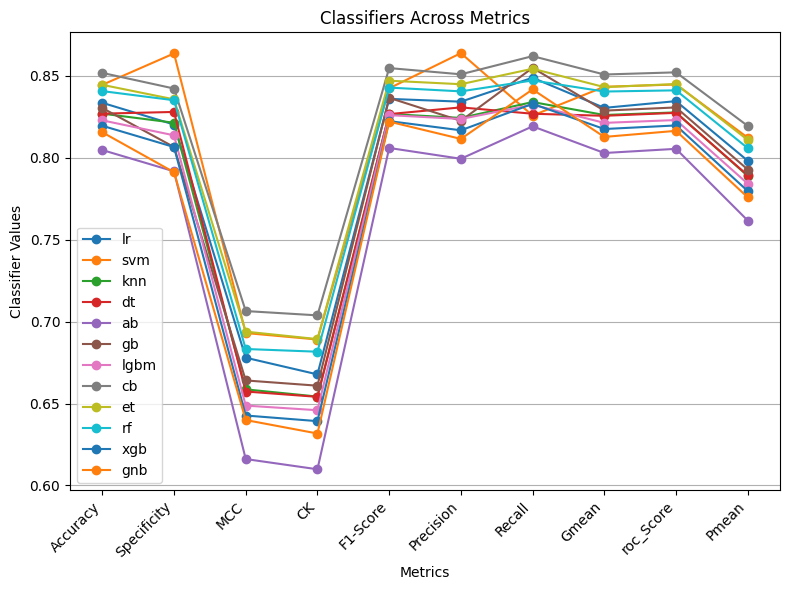

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
RFEf  0        lr       0.812500  0.784545     0.620874 0.616726 0.835956  0.842569   0.833516 0.806765 0.809031   0.773609
RFEf  0       svm       0.787500  0.733636     0.566391 0.559477 0.819981  0.820078   0.826923 0.773512 0.780280   0.740864
RFEf  0       knn       0.804167  0.695455     0.600577 0.589652 0.839079  0.801944   0.884066 0.780458 0.789760   0.753906
RFEf  0        dt       0.766667  0.673636     0.521449 0.514734 0.803679  0.779297   0.833516 0.746133 0.753576   0.710299
RFEf  0        ab       0.791667  0.743636     0.576958 0.571960 0.819169  0.817091   0.825824 0.781114 0.784730   0.745794
RFEf  0        gb       0.762500  0.704545     0.517903 0.509068 0.795146  0.796610   0.803846 0.744411 0.754196

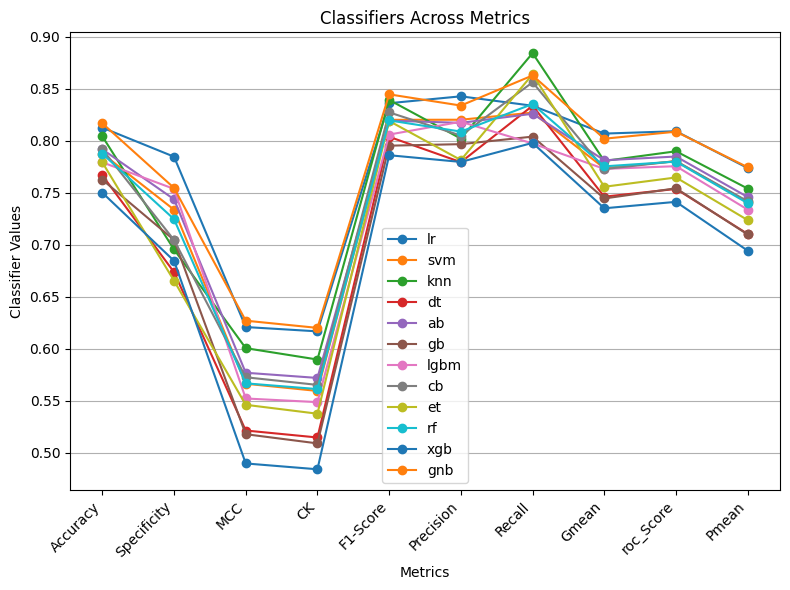

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
RFEf  1        lr       0.833466  0.804945     0.672980 0.667223 0.838564  0.820312   0.863187 0.831600 0.834066   0.796260
RFEf  1       svm       0.837169  0.841209     0.676407 0.674378 0.838051  0.845165   0.833516 0.836547 0.837363   0.802201
RFEf  1       knn       0.837302  0.834066     0.679451 0.674835 0.837867  0.839437   0.841758 0.836025 0.837912   0.802073
RFEf  1        dt       0.811905  0.813187     0.627578 0.623788 0.810661  0.816106   0.810989 0.809678 0.812088   0.770664
RFEf  1        ab       0.801455  0.806593     0.603980 0.602910 0.800325  0.805495   0.796703 0.801107 0.801648   0.757802
RFEf  1        gb       0.815873  0.785165     0.635803 0.632019 0.823706  0.804646   0.847802 0.814248 0.816484   0.775083
RFEf  1

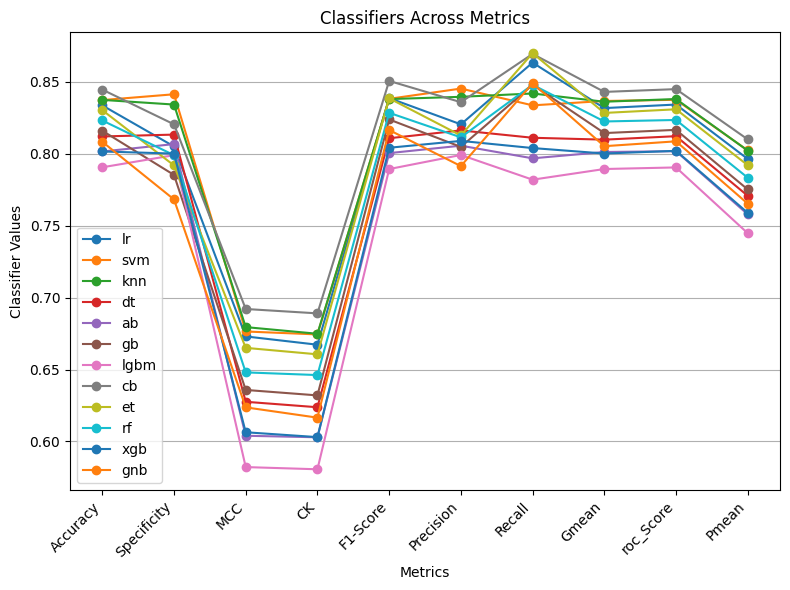

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
FORWf 0        lr       0.812500  0.754545     0.618563 0.613694 0.838794  0.827353   0.854945 0.800704 0.804745   0.769538
FORWf 0       svm       0.791667  0.703636     0.572742 0.565437 0.826188  0.802850   0.855495 0.771959 0.779565   0.741060
FORWf 0       knn       0.804167  0.685455     0.598768 0.587894 0.840745  0.799032   0.891209 0.777875 0.788332   0.752608
FORWf 0        dt       0.745833  0.644545     0.474511 0.469967 0.787796  0.761325   0.818681 0.723781 0.731613   0.684228
FORWf 0        ab       0.775000  0.715455     0.542464 0.536665 0.806358  0.800186   0.818132 0.761697 0.766793   0.724750
FORWf 0        gb       0.779167  0.723636     0.549723 0.544202 0.810504  0.807089   0.819231 0.766076 0.771434

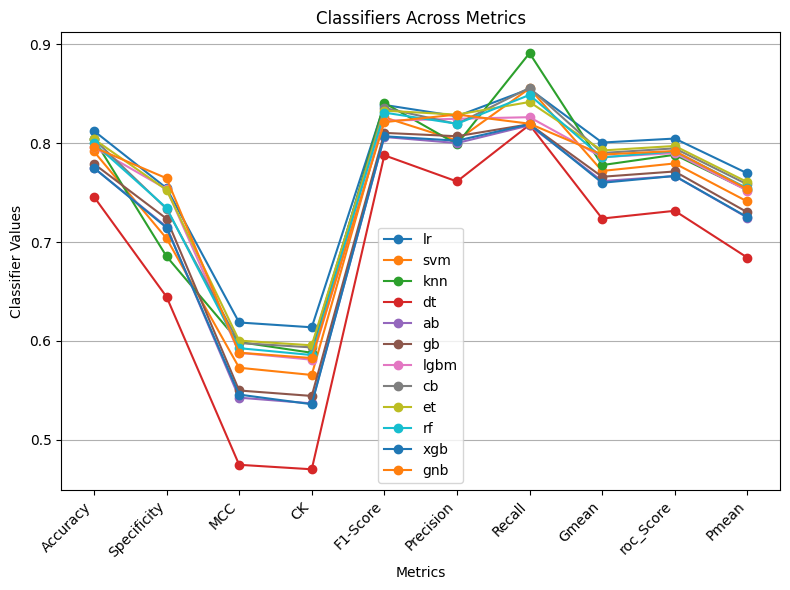

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
FORWf 1        lr       0.815476  0.784066     0.640111 0.631616 0.821898  0.804177   0.848901 0.812632 0.816484   0.775040
FORWf 1       svm       0.837302  0.856044     0.677936 0.674632 0.834902  0.854707   0.819231 0.836384 0.837637   0.803197
FORWf 1       knn       0.826455  0.828022     0.658289 0.653396 0.828003  0.835092   0.826923 0.825602 0.827473   0.789917
FORWf 1        dt       0.786111  0.778022     0.577813 0.572706 0.789087  0.789935   0.795604 0.783564 0.786813   0.739962
FORWf 1        ab       0.811905  0.812637     0.625960 0.623870 0.811978  0.815128   0.811538 0.811202 0.812088   0.770701
FORWf 1        gb       0.826190  0.798352     0.656357 0.652441 0.832645  0.815848   0.854396 0.824048 0.826374   0.787406
FORWf 1

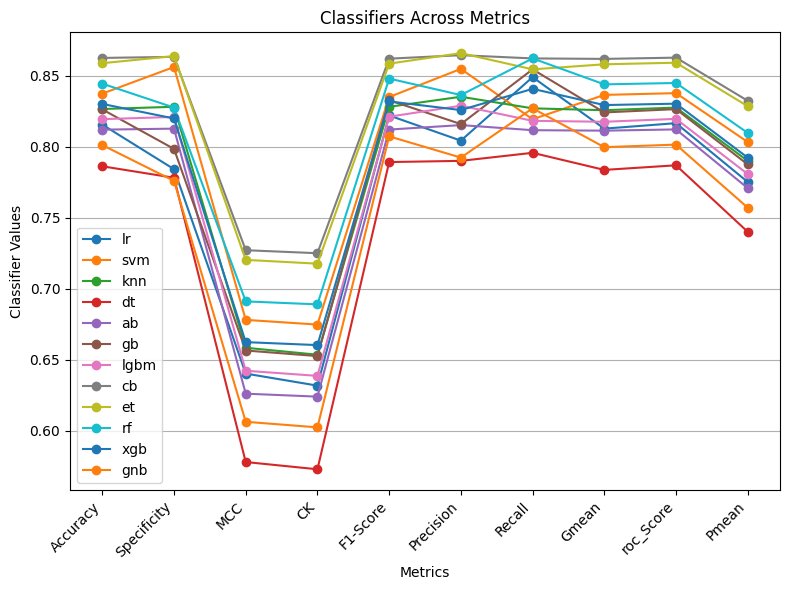

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName   SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
BACKWf 0        lr       0.795833  0.744545     0.584515 0.577325 0.824781  0.824913   0.832418 0.780755 0.788482   0.750396
BACKWf 0       svm       0.791667  0.664545     0.568773 0.557352 0.832415  0.792507   0.883516 0.755097 0.774031   0.735545
BACKWf 0       knn       0.783333  0.675455     0.555567 0.545108 0.821120  0.789301   0.861538 0.755764 0.768497   0.728409
BACKWf 0        dt       0.762500  0.726364     0.521050 0.512169 0.790566  0.806056   0.788462 0.746422 0.757413   0.712333
BACKWf 0        ab       0.808333  0.753636     0.611586 0.602654 0.832690  0.829660   0.845055 0.789976 0.799346   0.763659
BACKWf 0        gb       0.787500  0.705455     0.564282 0.555388 0.819474  0.803714   0.845604 0.758934 0

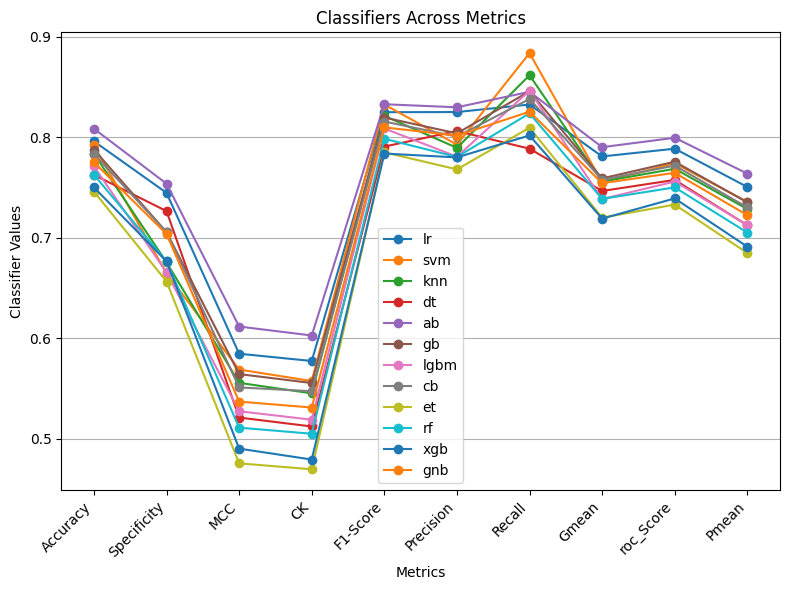

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName   SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
BACKWf 1        lr       0.797487  0.774725     0.602944 0.594716 0.801156  0.794312   0.820330 0.792704 0.797527   0.752878
BACKWf 1       svm       0.826455  0.768681     0.660182 0.652866 0.837480  0.798421   0.884615 0.822594 0.826648   0.786438
BACKWf 1       knn       0.787037  0.740110     0.579593 0.574082 0.796902  0.765894   0.834615 0.784033 0.787363   0.738848
BACKWf 1        dt       0.769444  0.747253     0.543642 0.538591 0.774712  0.768000   0.791209 0.763095 0.769231   0.718353
BACKWf 1        ab       0.819444  0.811538     0.647782 0.638797 0.820308  0.824685   0.827473 0.814510 0.819505   0.780449
BACKWf 1        gb       0.794180  0.775824     0.592412 0.588043 0.795949  0.786347   0.812088 0.790524 0.793956   0.747702


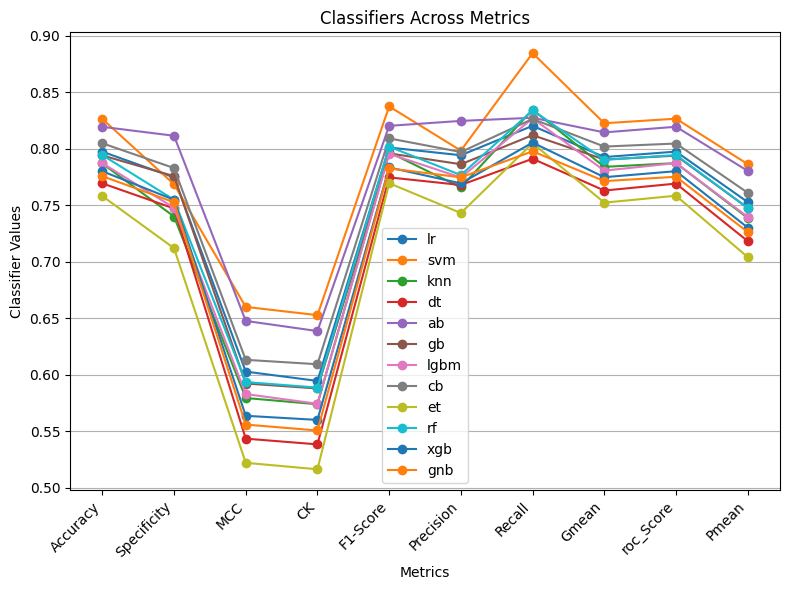

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
ANOf  0        lr       0.816667  0.754545     0.626341 0.621462 0.843984  0.829053   0.863187 0.804715 0.808866   0.774313
ANOf  0       svm       0.800000  0.753636     0.591253 0.588460 0.828002  0.824382   0.834066 0.791163 0.793851   0.756090
ANOf  0       knn       0.787500  0.685455     0.564364 0.555460 0.825170  0.795134   0.863187 0.765443 0.774321   0.735115
ANOf  0        dt       0.762500  0.715455     0.518927 0.513208 0.792478  0.795256   0.797253 0.750750 0.756354   0.711353
ANOf  0        ab       0.787500  0.754545     0.569215 0.565071 0.813587  0.820305   0.811538 0.779758 0.783042   0.742729
ANOf  0        gb       0.795833  0.755455     0.586567 0.581160 0.822258  0.824815   0.826374 0.785026 0.790914

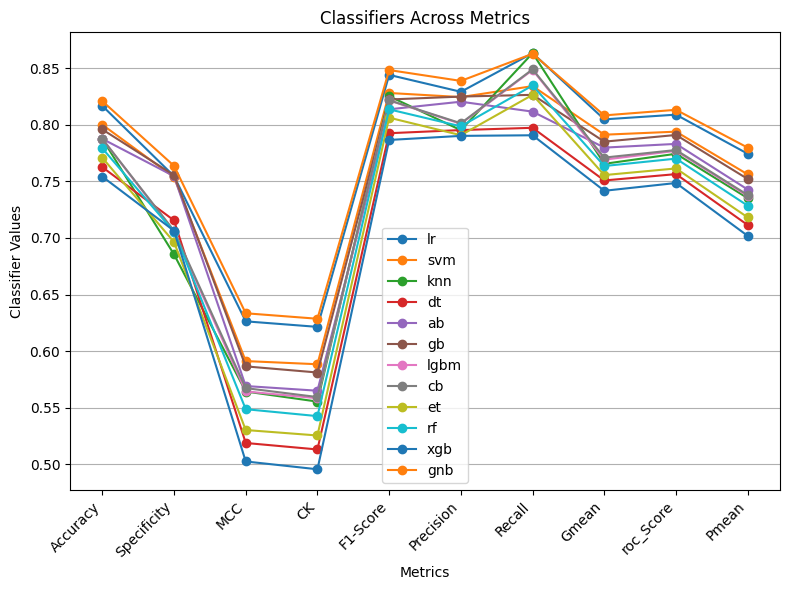

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
ANOf  1        lr       0.826455  0.775824     0.660110 0.652824 0.835192  0.800451   0.877473 0.823217 0.826648   0.786466
ANOf  1       svm       0.833730  0.849451     0.672473 0.667691 0.831839  0.850403   0.819231 0.832380 0.834341   0.799060
ANOf  1       knn       0.830026  0.841758     0.663094 0.660011 0.827009  0.839309   0.818681 0.828714 0.830220   0.793202
ANOf  1        dt       0.790873  0.784615     0.583502 0.581776 0.794190  0.792926   0.797802 0.790223 0.791209   0.745235
ANOf  1        ab       0.807804  0.782418     0.622733 0.615300 0.812992  0.802769   0.832418 0.803474 0.807418   0.765258
ANOf  1        gb       0.815741  0.784066     0.634213 0.631522 0.821918  0.799272   0.847802 0.814617 0.815934   0.773898
ANOf  1

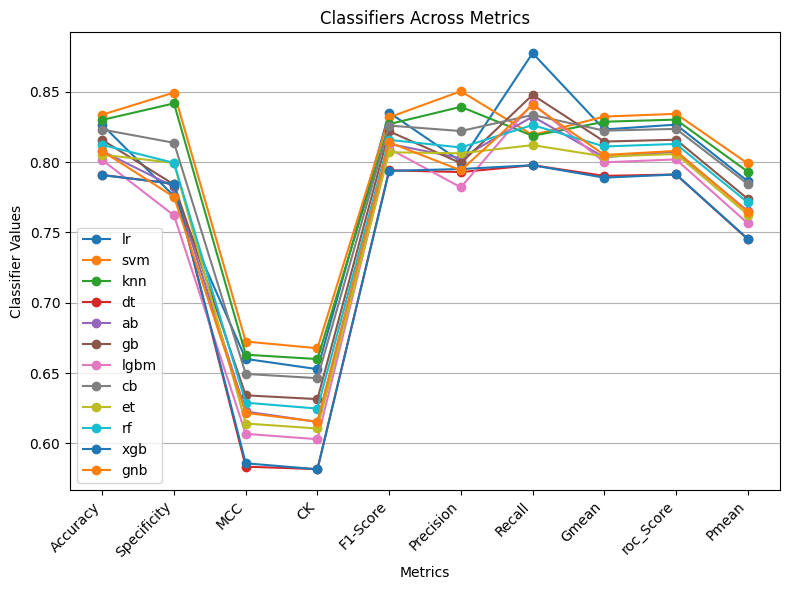

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
PEARf 0        lr       0.808333  0.754545     0.610920 0.605725 0.834569  0.826145   0.847802 0.797171 0.801174   0.765154
PEARf 0       svm       0.783333  0.713636     0.554492 0.551467 0.816785  0.801745   0.834615 0.769914 0.774126   0.733346
PEARf 0       knn       0.812500  0.705455     0.618784 0.607426 0.845749  0.808187   0.891758 0.789545 0.798606   0.764223
PEARf 0        dt       0.775000  0.723636     0.541479 0.537634 0.805177  0.801983   0.812088 0.764069 0.767862   0.725437
PEARf 0        ab       0.758333  0.725455     0.510668 0.506048 0.788185  0.799517   0.782418 0.749911 0.753936   0.708275
PEARf 0        gb       0.766667  0.694545     0.521808 0.515326 0.802316  0.792978   0.818681 0.748297 0.756613

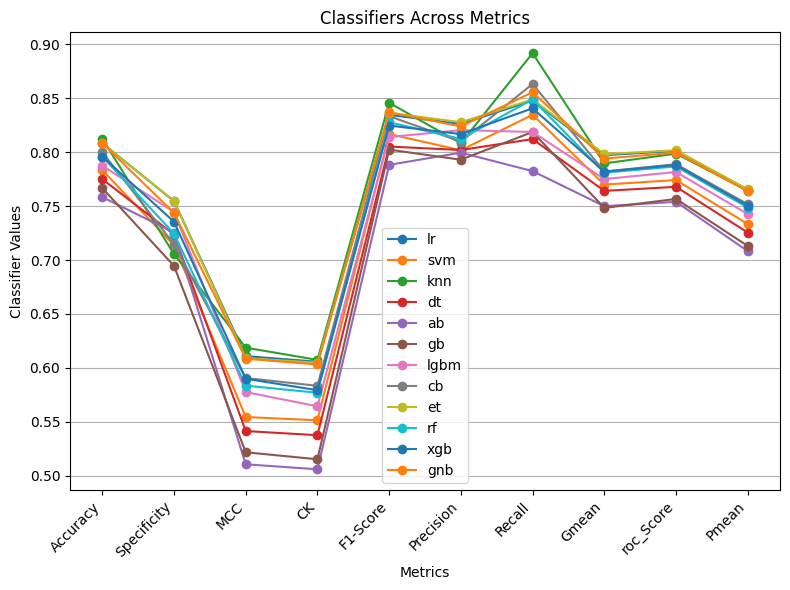

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
PEARf 1        lr       0.808333  0.775824     0.624404 0.616924 0.814390  0.794828   0.841758 0.805529 0.808791   0.765642
PEARf 1       svm       0.822487  0.840659     0.647984 0.644636 0.818702  0.838247   0.803846 0.820697 0.822253   0.784390
PEARf 1       knn       0.801058  0.790659     0.604036 0.602308 0.801733  0.793626   0.812088 0.800547 0.801374   0.756381
PEARf 1        dt       0.804762  0.806593     0.615767 0.609094 0.804330  0.814875   0.802747 0.800888 0.804670   0.762636
PEARf 1        ab       0.815741  0.835165     0.636090 0.631644 0.812066  0.833095   0.797253 0.814335 0.816209   0.776844
PEARf 1        gb       0.837566  0.835714     0.678309 0.675385 0.839916  0.842889   0.840659 0.836923 0.838187   0.802839
PEARf 1

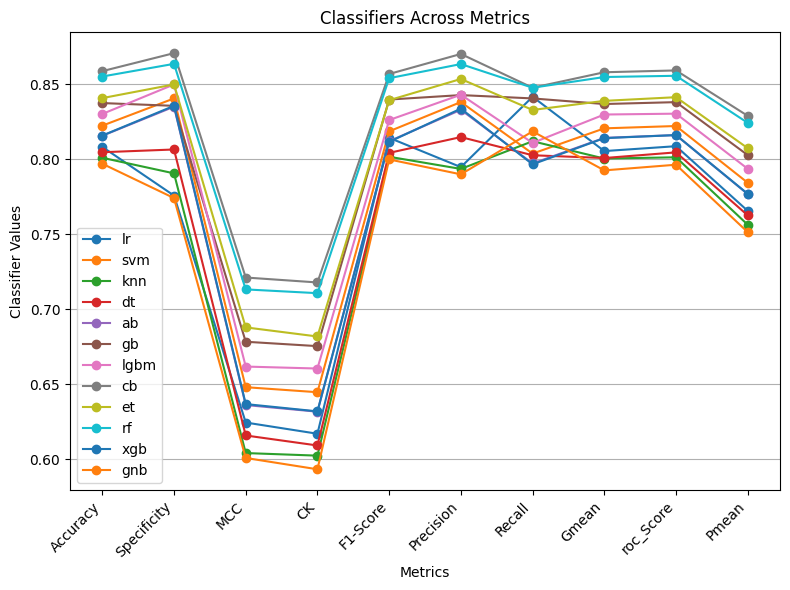

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName   SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
LASSOf 0        lr       0.808333  0.754545     0.610398 0.605744 0.834606  0.825925   0.847802 0.797406 0.801174   0.765104
LASSOf 0       svm       0.791667  0.723636     0.574363 0.567175 0.824412  0.814312   0.841209 0.775436 0.782423   0.743848
LASSOf 0       knn       0.812500  0.705455     0.616726 0.606324 0.846747  0.810514   0.891209 0.788993 0.798332   0.764089
LASSOf 0        dt       0.762500  0.692727     0.511977 0.508154 0.797805  0.787997   0.811538 0.747033 0.752133   0.707985
LASSOf 0        ab       0.775000  0.715455     0.542464 0.536665 0.806358  0.800186   0.818132 0.761697 0.766793   0.724750
LASSOf 0        gb       0.783333  0.733636     0.558466 0.553658 0.812536  0.811215   0.818681 0.771490 0

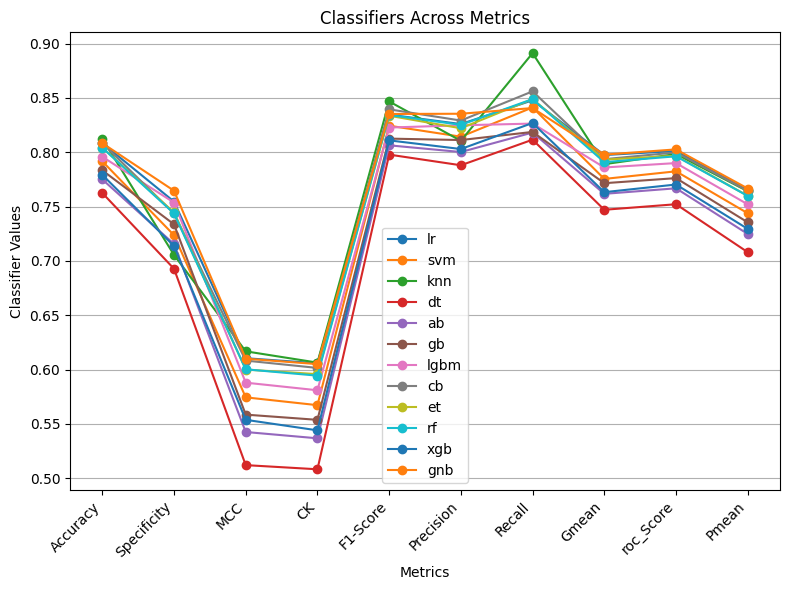

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName   SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
LASSOf 1        lr       0.837698  0.806593     0.684661 0.676080 0.843415  0.825118   0.870879 0.834879 0.838736   0.802007
LASSOf 1       svm       0.848016  0.863736     0.700000 0.696264 0.846400  0.864066   0.833516 0.847367 0.848626   0.816443
LASSOf 1       knn       0.826323  0.791758     0.657903 0.653261 0.833574  0.810211   0.862637 0.824867 0.827198   0.787526
LASSOf 1        dt       0.786772  0.784615     0.576507 0.573778 0.787455  0.788173   0.790110 0.786279 0.787363   0.740117
LASSOf 1        ab       0.797619  0.799451     0.601677 0.595865 0.798304  0.806712   0.797802 0.795649 0.798626   0.754634
LASSOf 1        gb       0.819444  0.791758     0.641984 0.638756 0.825888  0.808754   0.847253 0.817430 0.819505   0.778975


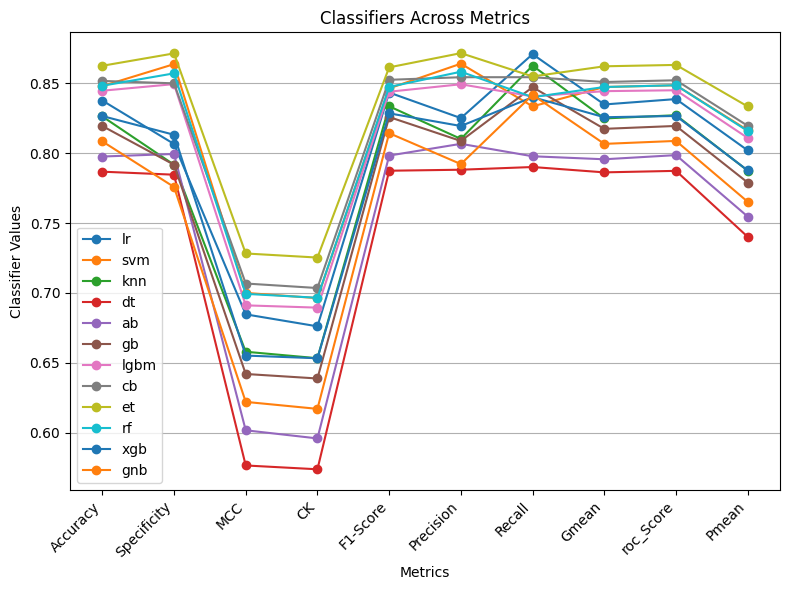

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
Uf    0        lr       0.812500  0.754545     0.618563 0.613694 0.838794  0.827353   0.854945 0.800704 0.804745   0.769538
Uf    0       svm       0.791667  0.703636     0.572742 0.565437 0.826188  0.802850   0.855495 0.771959 0.779565   0.741060
Uf    0       knn       0.804167  0.685455     0.598768 0.587894 0.840745  0.799032   0.891209 0.777875 0.788332   0.752608
Uf    0        dt       0.770833  0.683636     0.531868 0.524030 0.806234  0.786275   0.834066 0.750219 0.758851   0.716224
Uf    0        ab       0.775000  0.715455     0.542464 0.536665 0.806358  0.800186   0.818132 0.761697 0.766793   0.724750
Uf    0        gb       0.775000  0.713636     0.540064 0.535282 0.807370  0.800037   0.819231 0.761266 0.766434

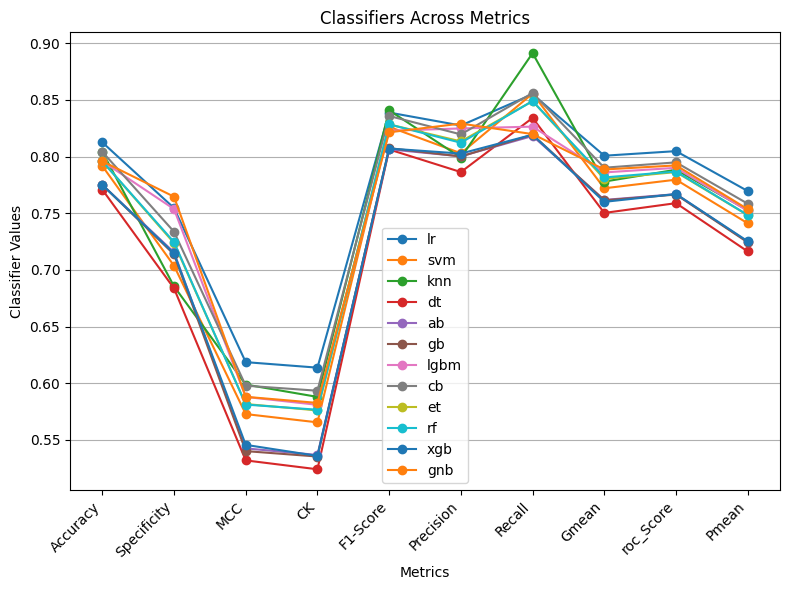

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName  SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
Uf    1        lr       0.819180  0.783516     0.647396 0.638811 0.825893  0.804676   0.856593 0.816301 0.820055   0.779158
Uf    1       svm       0.844444  0.841758     0.693068 0.688797 0.846620  0.851374   0.847253 0.842076 0.844505   0.811100
Uf    1       knn       0.837434  0.820879     0.678010 0.675009 0.841672  0.832175   0.854945 0.836425 0.837912   0.801607
Uf    1        dt       0.819180  0.792857     0.644917 0.638369 0.824004  0.808990   0.846154 0.816533 0.819505   0.778946
Uf    1        ab       0.816270  0.806593     0.635674 0.632823 0.818352  0.812637   0.827473 0.815939 0.817033   0.775866
Uf    1        gb       0.841402  0.821429     0.687090 0.682875 0.846663  0.836342   0.862088 0.839446 0.841758   0.806566
Uf    1

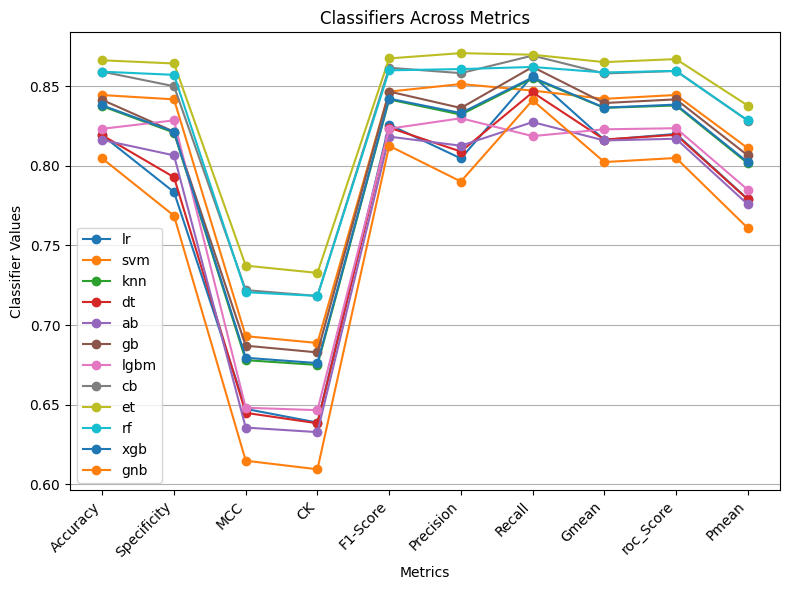

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1.17647059 0.86956522]
FName              SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
majority_features 0        lr       0.770833  0.744545     0.538499 0.531513 0.798004  0.813303   0.789560 0.762325 0.767053   0.723960
majority_features 0       svm       0.766667  0.636364     0.519403 0.508519 0.810646  0.768898   0.862088 0.735695 0.749226   0.706389
majority_features 0       knn       0.712500  0.557273     0.407612 0.392457 0.766805  0.722925   0.826374 0.666682 0.691823   0.638272
majority_features 0        dt       0.762500  0.734545     0.519331 0.514647 0.789848  0.804414   0.781868 0.754138 0.758207   0.713278
majority_features 0        ab       0.779167  0.736364     0.549110 0.547825 0.807723  0.805971   0.810989 0.771864 0.773676   0.731410
majority_features 0        gb       0.77

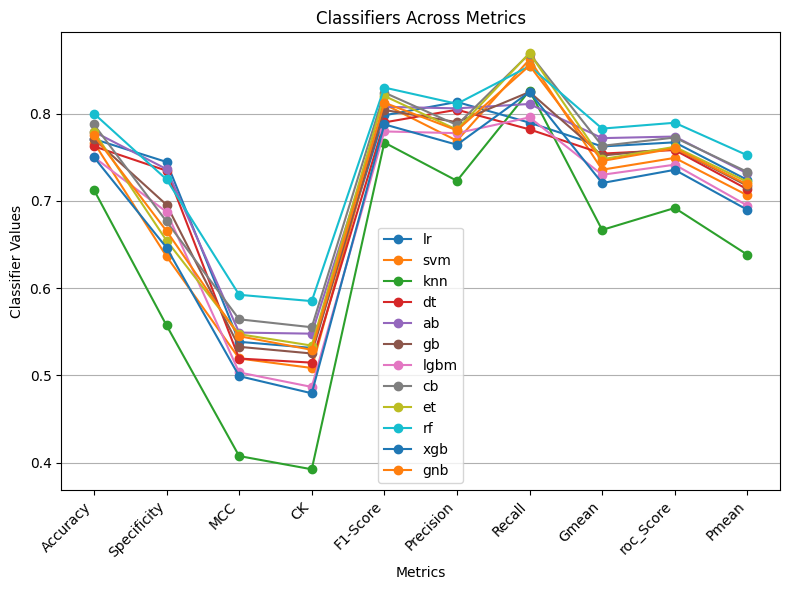

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
weights =  [1. 1.]
FName              SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
majority_features 1        lr       0.779101  0.754396     0.566884 0.559035 0.785126  0.773326   0.806044 0.776254 0.780220   0.731154
majority_features 1       svm       0.793783  0.769231     0.600533 0.588210 0.796762  0.792739   0.819780 0.788246 0.794505   0.749310
majority_features 1       knn       0.783069  0.791758     0.578255 0.566942 0.780053  0.801809   0.776374 0.778121 0.784066   0.737827
majority_features 1        dt       0.750794  0.748352     0.508023 0.501881 0.750484  0.756637   0.754396 0.746405 0.751374   0.696483
majority_features 1        ab       0.764947  0.776923     0.536942 0.529994 0.761825  0.779904   0.753846 0.761927 0.765385   0.714633
majority_features 1        gb       0.775661  0.776374     

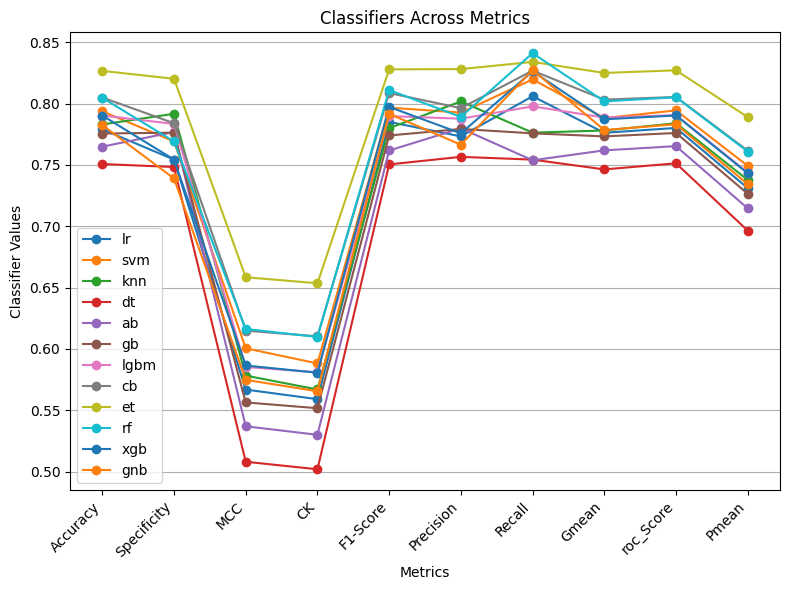

+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [104]:
for i in lt:
    d_x = fdf[i]
    #print(d_x)
    dfy = fdf[["TARGET"]]
    dt=evall(d_x,y,fsname[tin],0)
    odresult.extend(dt)
    dfout=pd.DataFrame(dt,columns=['FName','SMOTE','Classifier','Accuracy','Specificity','MCC','CK','F1-Score','Precision','Recall','Gmean','roc_Score'])
    dfout=favg(dfout)
    evgraph(dfout)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    
    #with balancing
    
    os = SMOTE()
    Xkm, ykm = os.fit_resample(d_x, y)
    dtkm=evall(Xkm,ykm,fsname[tin],1)
    odresult.extend(dtkm)
    dfkm=pd.DataFrame(dtkm,columns=['FName','SMOTE','Classifier','Accuracy','Specificity','MCC','CK','F1-Score','Precision','Recall','Gmean','roc_Score'])
    dfkm=favg(dfkm)
    evgraph(dfkm)
    print("+++++++++++++++++++++++++++++++++++++++++++++End++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    tin=tin+1

In [111]:
dF_FS_RES=pd.DataFrame(odresult,columns=['FName','SMOTE','Classifier','Accuracy','Specificity','MCC','CK','F1-Score','Precision','Recall','Gmean','roc_Score'])
dF_FS_RES

FName  SMOTE Classifier  Accuracy  Specificity       MCC  \
0                  LRf      0         lr  0.725000     0.665455  0.438812   
1                  LRf      0        svm  0.733333     0.587273  0.449825   
2                  LRf      0        knn  0.725000     0.637273  0.436004   
3                  LRf      0         dt  0.650000     0.574545  0.288361   
4                  LRf      0         ab  0.704167     0.656364  0.399865   
..                 ...    ...        ...       ...          ...       ...   
355  majority_features      1         cb  0.805026     0.784066  0.614908   
356  majority_features      1         et  0.826720     0.820330  0.658488   
357  majority_features      1         rf  0.804762     0.769231  0.616256   
358  majority_features      1        xgb  0.790344     0.754396  0.586511   
359  majority_features      1        gnb  0.782540     0.739011  0.574795   

           CK  F1-Score  Precision    Recall     Gmean  roc_Score  
0    0.432345  0.762712   0.768174  0.768132  0.705747   0.716793  
1    0.436265  0.784113   0.741570  0.840110  0.693520   0.713691  
2    0.430022  0.766746   0.750333  0.789560  0.704881   0.713417  
3    0.278878  0.695344   0.700429  0.703297  0.623597   0.638921  
4    0.394979  0.738986   0.746047  0.738462  0.691249   0.697413  
..        ...       ...        ...       ...       ...        ...  
355  0.610295  0.808674   0.796385  0.826923  0.803308   0.805495  
356  0.653540  0.827969   0.828203  0.834066  0.825066   0.827198  
357  0.609746  0.811108   0.789183  0.841209  0.801847   0.805220  
358  0.580593  0.797353   0.775825  0.826374  0.787241   0.790385  
359  0.565517  0.791688   0.766560  0.827473  0.778463   0.783242  

[360 rows x 12 columns]

In [112]:
dF_FS_RES=favg(dF_FS_RES)

FName              SMOTE Classifier  Accuracy  Specificity  MCC      CK       F1-Score  Precision  Recall   Gmean    roc_Score  Pmean  
              LRf 0        lr       0.725000  0.665455     0.438812 0.432345 0.762712  0.768174   0.768132 0.705747 0.716793   0.664797
              LRf 0       svm       0.733333  0.587273     0.449825 0.436265 0.784113  0.741570   0.840110 0.693520 0.713691   0.664411
              LRf 0       knn       0.725000  0.637273     0.436004 0.430022 0.766746  0.750333   0.789560 0.704881 0.713417   0.661471
              LRf 0        dt       0.650000  0.574545     0.288361 0.278878 0.695344  0.700429   0.703297 0.623597 0.638921   0.572597
              LRf 0        ab       0.704167  0.656364     0.399865 0.394979 0.738986  0.746047   0.738462 0.691249 0.697413   0.640837
              LRf 0        gb       0.750000  0.616364     0.483063 0.471080 0.796722  0.758650   0.846703 0.711290 0.731533   0.685045
              LRf 0      lgbm       0.750000  0.

In [113]:
dF_FS_RES.to_csv("Heart_D.csv", index=False)
dF_FS_RES

FName  SMOTE Classifier  Accuracy  Specificity       MCC  \
0                  LRf      0         lr  0.725000     0.665455  0.438812   
1                  LRf      0        svm  0.733333     0.587273  0.449825   
2                  LRf      0        knn  0.725000     0.637273  0.436004   
3                  LRf      0         dt  0.650000     0.574545  0.288361   
4                  LRf      0         ab  0.704167     0.656364  0.399865   
..                 ...    ...        ...       ...          ...       ...   
355  majority_features      1         cb  0.805026     0.784066  0.614908   
356  majority_features      1         et  0.826720     0.820330  0.658488   
357  majority_features      1         rf  0.804762     0.769231  0.616256   
358  majority_features      1        xgb  0.790344     0.754396  0.586511   
359  majority_features      1        gnb  0.782540     0.739011  0.574795   

           CK  F1-Score  Precision    Recall     Gmean  roc_Score     Pmean  
0    0.432345  0.762712   0.768174  0.768132  0.705747   0.716793  0.664797  
1    0.436265  0.784113   0.741570  0.840110  0.693520   0.713691  0.664411  
2    0.430022  0.766746   0.750333  0.789560  0.704881   0.713417  0.661471  
3    0.278878  0.695344   0.700429  0.703297  0.623597   0.638921  0.572597  
4    0.394979  0.738986   0.746047  0.738462  0.691249   0.697413  0.640837  
..        ...       ...        ...       ...       ...        ...       ...  
355  0.610295  0.808674   0.796385  0.826923  0.803308   0.805495  0.761675  
356  0.653540  0.827969   0.828203  0.834066  0.825066   0.827198  0.789064  
357  0.609746  0.811108   0.789183  0.841209  0.801847   0.805220  0.760951  
358  0.580593  0.797353   0.775825  0.826374  0.787241   0.790385  0.743225  
359  0.565517  0.791688   0.766560  0.827473  0.778463   0.783242  0.734365  

[360 rows x 13 columns]

In [114]:
maxpmean= dF_FS_RES.loc[dF_FS_RES['Pmean'].idxmax()]

# Display the row with the maximum salary
print("Row with the maximum pmean:")
print(maxpmean)

Row with the maximum pmean:
FName                Uf
SMOTE                 1
Classifier           et
Accuracy        0.86627
Specificity    0.864286
MCC            0.737342
CK             0.732782
F1-Score       0.867468
Precision      0.870771
Recall          0.86978
Gmean          0.865125
roc_Score      0.867033
Pmean          0.837873
Name: 332, dtype: object


In [115]:
maxac_Score= dF_FS_RES.loc[dF_FS_RES['Accuracy'].idxmax()]

# Display the row with the maximum salary
print("Row with the maximum Ac_Score:")
print(maxac_Score)

Row with the maximum Ac_Score:
FName                Uf
SMOTE                 1
Classifier           et
Accuracy        0.86627
Specificity    0.864286
MCC            0.737342
CK             0.732782
F1-Score       0.867468
Precision      0.870771
Recall          0.86978
Gmean          0.865125
roc_Score      0.867033
Pmean          0.837873
Name: 332, dtype: object


In [116]:
maxroc_Score= dF_FS_RES.loc[dF_FS_RES['roc_Score'].idxmax()]

# Display the row with the maximum 
print("Row with the maximum roc_Score:")
print(maxroc_Score)

Row with the maximum roc_Score:
FName                Uf
SMOTE                 1
Classifier           et
Accuracy        0.86627
Specificity    0.864286
MCC            0.737342
CK             0.732782
F1-Score       0.867468
Precision      0.870771
Recall          0.86978
Gmean          0.865125
roc_Score      0.867033
Pmean          0.837873
Name: 332, dtype: object


In [117]:
print(dF_FS_RES.index[dF_FS_RES['Pmean'].idxmax()])
ind=dF_FS_RES.index[dF_FS_RES['Pmean'].idxmax()]

332
